<a href="https://colab.research.google.com/github/fabiofernandezaguilar/CRAutos_Selenium_Python/blob/master/ninja_Idealista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparamos el entorno (cargamos repo, instalamos librerías...)

In [1]:
#@title 1. Clonamos el repo de GitHub
!git clone https://github.com/paezha/idealista18.git

Cloning into 'idealista18'...
remote: Enumerating objects: 1141, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 1141 (delta 43), reused 80 (delta 30), pack-reused 1030 (from 1)
Receiving objects: 100% (1141/1141), 77.02 MiB | 16.01 MiB/s, done.
Resolving deltas: 100% (517/517), done.


In [2]:
#@title 2. Instalamos la librería que nos va a permitir usar R (los datos en el repo están en R)
!pip install rpy2

In [3]:
# Cargamos R magic en Google Colab a partir de ahora las celdas que empiecen por %%R son de código en R
%load_ext rpy2.ipython

# Hacemos nuestros pinitos examinando los datos en R 😊

In [4]:
%%R
# Cargamos el archivo de datos en R (.rda)
load('idealista18/data/Madrid_Sale.rda')

In [5]:
%%R
# Verificamos qué objetos se cargaron en el entorno
ls()

[1] "Madrid_Sale"


In [6]:
%%R
# Verificamos la estructura del dataframe 'Madrid_Sale'. Puedes ver sus columnas :)
str(Madrid_Sale)

Classes ‘sf’ and 'data.frame':	94815 obs. of  42 variables:
 $ ASSETID                      : Factor w/ 76862 levels "A10000037964896093228",..: 23027 61502 15469 52634 42018 38599 52302 68746 74921 47587 ...
 $ PERIOD                       : int  201803 201803 201803 201803 201803 201803 201803 201803 201803 201803 ...
 $ PRICE                        : num  126000 235000 373000 284000 228000 ...
 $ UNITPRICE                    : num  2681 4352 4973 5917 4560 ...
 $ CONSTRUCTEDAREA              : int  47 54 75 48 50 127 35 100 70 360 ...
 $ ROOMNUMBER                   : int  1 1 2 1 0 3 0 2 1 4 ...
 $ BATHNUMBER                   : int  1 1 1 1 1 2 1 1 1 3 ...
 $ HASTERRACE                   : int  0 0 0 0 0 0 0 1 0 1 ...
 $ HASLIFT                      : int  1 0 0 1 0 1 1 1 1 1 ...
 $ HASAIRCONDITIONING           : int  1 0 1 1 0 0 0 0 0 1 ...
 $ AMENITYID                    : int  3 3 3 3 3 3 3 3 1 3 ...
 $ HASPARKINGSPACE              : int  0 0 0 0 0 0 0 0 1 1 ...
 $ ISPARKINGSPA

In [7]:
%%R
# Exportamos a un archivo .csv
write.csv(Madrid_Sale, 'Madrid_Sale.csv', row.names = FALSE)

# Aquí ya empezamos con Python🐍  y cargamos los datos en dataframes de Pandas

Cargamos las librerías de Python necesarias:
- `pandas` para manipulación de datos. Cada función de la librería que utilicemos tendremos que indicar que pertenece a pandas anteponiendo el prefijo `pd.`
- `seaborn` y `matplotlib` para visualización

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos por un lado los datos y por otro las cabeceras de las columnas. Si os descargáis el CSV y lo abrís en una hoja de cálculo veréis que la última característica `geometry` ocupa dos columnas lo que provoca que el dataset no se cargue correctamente si lo hacemos de manera directa usando:

`madrid_data = pd.read_csv('Madrid_Sale.csv')`

In [9]:
# Cargamos los datos en el dataset
madrid_data = pd.read_csv('Madrid_Sale.csv',header=None, skiprows=1)

In [10]:
madrid_data.head()

0       1         2            3   4   5   6   7   8   \
0  A15019136831406238029  201803  126000.0  2680.851064  47   1   1   0   1   
1   A6677225905472065344  201803  235000.0  4351.851852  54   1   1   0   0   
2  A13341979748618524775  201803  373000.0  4973.333333  75   2   1   0   0   
3   A4775182175615276542  201803  284000.0  5916.666667  48   1   1   0   1   
4   A2492087730711701973  201803  228000.0  4560.000000  50   0   1   0   0   

   9   ...  33  34  35        36        37        38        39         40  \
0   1  ...   0   1   0  8.058429  0.872075  6.868677 -3.766933  40.362485   
1   0  ...   0   0   1  0.876369  0.116382  1.544125 -3.710725  40.422430   
2   1  ...   0   0   1  0.907479  0.139109  1.608444 -3.711571  40.422190   
3   1  ...   0   0   1  0.845462  0.144299  1.516166 -3.710440  40.422251   
4   0  ...   0   0   1  1.250231  0.337098  1.794136 -3.714340  40.408741   

                    41                  42  
0  c(-3.76693282740492   40.3624847687389)  
1  c(-3.71072465730388   40.4224298907482)  
2    c(-3.711570866261   40.4221904507903)  
3  c(-3.71043986942694   40.4222514604856)  
4  c(-3.71434022421324   40.4087408924555)  

[5 rows x 43 columns]

Las columnas 41 y 42 son las correspondientes al `geometry` y representan la longitud y latitud que ya tenemos en las columnas 39 y 40. Así que las eliminamos.

In [11]:
madrid_data = madrid_data.drop([41,42],axis=1)

In [12]:
# Cargamos las cabeceras de la columna (primera fila del CSV) en una lista y le asignamos los valores al dataset `madrid_data`
madrid_caracteristicas = pd.read_csv('Madrid_Sale.csv',nrows=0).columns.tolist()
madrid_data.columns = madrid_caracteristicas[:-1]
madrid_data.head()

ASSETID  PERIOD     PRICE    UNITPRICE  CONSTRUCTEDAREA  \
0  A15019136831406238029  201803  126000.0  2680.851064               47   
1   A6677225905472065344  201803  235000.0  4351.851852               54   
2  A13341979748618524775  201803  373000.0  4973.333333               75   
3   A4775182175615276542  201803  284000.0  5916.666667               48   
4   A2492087730711701973  201803  228000.0  4560.000000               50   

   ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  ...  \
0           1           1           0        1                   1  ...   
1           1           1           0        0                   0  ...   
2           2           1           0        0                   1  ...   
3           1           1           0        1                   1  ...   
4           0           1           0        0                   0  ...   

   CADDWELLINGCOUNT  CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  \
0               319                 3.0              0              1   
1                11                 3.0              0              0   
2                26                 3.0              0              0   
3                15                 5.0              0              0   
4                19                 7.0              0              0   

   BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
0              0                 8.058429           0.872075   
1              1                 0.876369           0.116382   
2              1                 0.907479           0.139109   
3              1                 0.845462           0.144299   
4              1                 1.250231           0.337098   

   DISTANCE_TO_CASTELLANA  LONGITUDE   LATITUDE  
0                6.868677  -3.766933  40.362485  
1                1.544125  -3.710725  40.422430  
2                1.608444  -3.711571  40.422190  
3                1.516166  -3.710440  40.422251  
4                1.794136  -3.714340  40.408741  

[5 rows x 41 columns]

1. Analizamos la estructura de los datos:
  1. `data.head()` → Muestra las primeras filas de nuestro Dataframe (`data`).
  2. `data.info()` → Muestra la descripción de las características del dataframe
      1. Nombre de las características/columnas
      2. Número de valores no nulos de cada característica
      3. Tipo de datos

In [13]:
madrid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94815 entries, 0 to 94814
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSETID                        94815 non-null  object 
 1   PERIOD                         94815 non-null  int64  
 2   PRICE                          94815 non-null  float64
 3   UNITPRICE                      94815 non-null  float64
 4   CONSTRUCTEDAREA                94815 non-null  int64  
 5   ROOMNUMBER                     94815 non-null  int64  
 6   BATHNUMBER                     94815 non-null  int64  
 7   HASTERRACE                     94815 non-null  int64  
 8   HASLIFT                        94815 non-null  int64  
 9   HASAIRCONDITIONING             94815 non-null  int64  
 10  AMENITYID                      94815 non-null  int64  
 11  HASPARKINGSPACE                94815 non-null  int64  
 12  ISPARKINGSPACEINCLUDEDINPRICE  94815 non-null 

In [14]:
madrid_data.describe()

PERIOD         PRICE     UNITPRICE  CONSTRUCTEDAREA  \
count   94815.000000  9.481500e+04  94815.000000     94815.000000   
mean   201808.613289  3.961101e+05   3661.051534       101.397163   
std         3.684625  4.170744e+05   1700.499398        67.078259   
min    201803.000000  2.100000e+04    805.309735        21.000000   
25%    201806.000000  1.600000e+05   2240.000000        62.000000   
50%    201809.000000  2.620000e+05   3480.000000        83.000000   
75%    201812.000000  4.670000e+05   4744.623034       117.000000   
max    201812.000000  8.133000e+06   9997.560976       985.000000   

         ROOMNUMBER    BATHNUMBER    HASTERRACE       HASLIFT  \
count  94815.000000  94815.000000  94815.000000  94815.000000   
mean       2.580900      1.585456      0.355260      0.695597   
std        1.244878      0.843024      0.478595      0.460157   
min        0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000      0.000000      0.000000   
50%        3.000000      1.000000      0.000000      1.000000   
75%        3.000000      2.000000      1.000000      1.000000   
max       93.000000     20.000000      1.000000      1.000000   

       HASAIRCONDITIONING     AMENITYID  ...  CADDWELLINGCOUNT  \
count        94815.000000  94815.000000  ...      94815.000000   
mean             0.448600      2.922660  ...         39.187164   
std              0.497354      0.314865  ...         54.254387   
min              0.000000      1.000000  ...          1.000000   
25%              0.000000      3.000000  ...         12.000000   
50%              0.000000      3.000000  ...         21.000000   
75%              1.000000      3.000000  ...         40.000000   
max              1.000000      3.000000  ...       1499.000000   

       CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  BUILTTYPEID_3  \
count        94814.000000   94815.000000   94815.000000   94815.000000   
mean             4.852184       0.030396       0.186563       0.783041   
std              1.462988       0.171675       0.389563       0.412177   
min              0.000000       0.000000       0.000000       0.000000   
25%              4.000000       0.000000       0.000000       1.000000   
50%              5.000000       0.000000       0.000000       1.000000   
75%              6.000000       0.000000       0.000000       1.000000   
max              9.000000       1.000000       1.000000       1.000000   

       DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  DISTANCE_TO_CASTELLANA  \
count             94815.000000       94815.000000            94815.000000   
mean                  4.486269           0.480916                2.679227   
std                   2.994906           1.433584                2.581346   
min                   0.007647           0.001416                0.001435   
25%                   2.407711           0.213458                1.035143   
50%                   4.123505           0.331882                1.956978   
75%                   6.213463           0.523025                3.840641   
max                 415.752584         399.477366              412.803688   

          LONGITUDE      LATITUDE  
count  94815.000000  94815.000000  
mean      -3.686408     40.421083  
std        0.039239      0.035495  
min       -3.833611     36.756391  
25%       -3.708474     40.396868  
50%       -3.694104     40.423295  
75%       -3.666227     40.441998  
max       -2.753303     40.520637  

[8 rows x 40 columns]

2. Analizamos las variables numéricas
  1. `data.describe()` → Muestra información de cada característica numérica.
      1. El número de valores
      2. El promedio de todos los valores
      3. La desviación típica
      4. El mínimo y el máximo
      5. El valor por debajo del cual están el 25% de los valore sd e la característica.
      6. El valor por debajo del cual están el 50% de los valore sd e la característica.
      7. El valor por debajo del cual están el 75% de los valore sd e la característica.

⚠️ En este dataset todas las variables son números pero veremos luego que tenemos muchas variables categóricas binarias

3. Visualizar los datos para obtener información → El histograma
    
    Para visualizar necesitamos importar la librería de Python matplotlib (lo hemos hecho al principio).

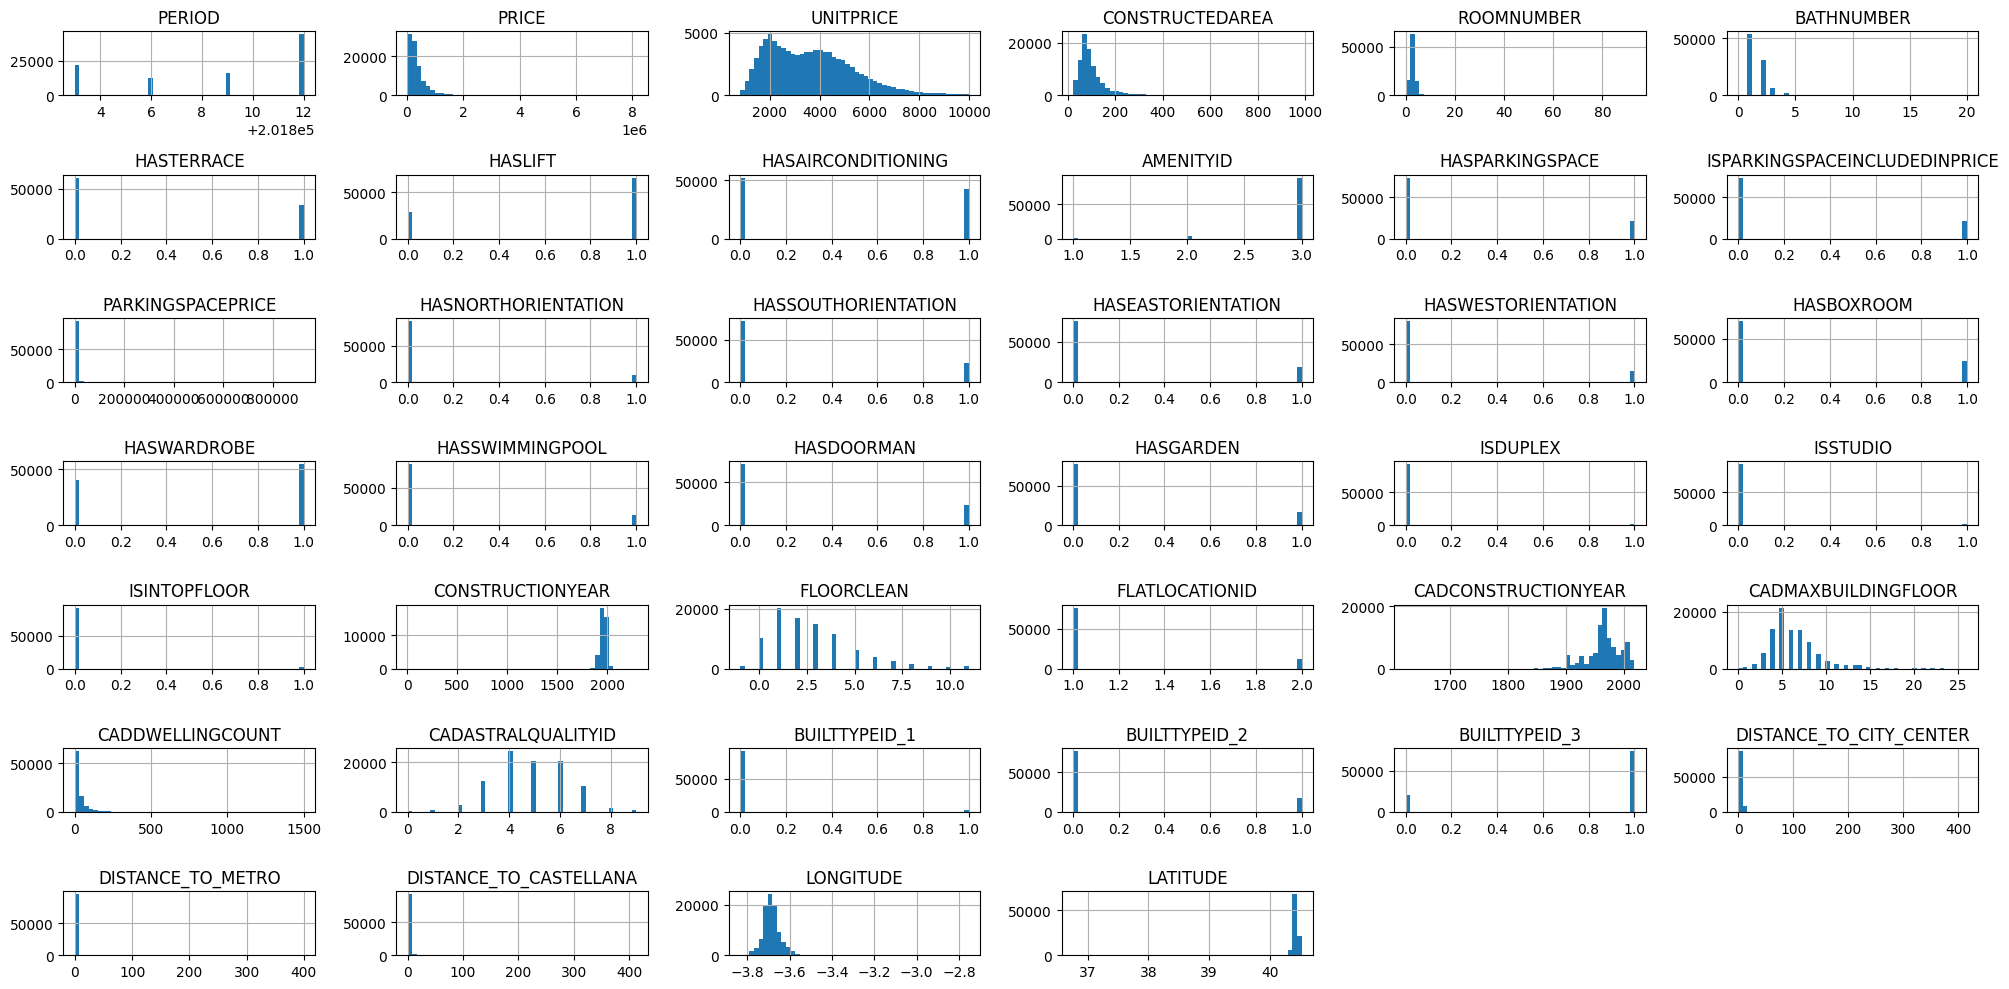

In [15]:
madrid_data.hist(bins=50, figsize=(20, 10))
plt.tight_layout()
plt.show()

🚨 A partir de la visualización de las distribuciones de los datos deberemos intentar entender lo máximo de las características:

- Encontrar variables categóricas disfrazadas de numéricas → El tipo de datos es numérico pero vemos en el histograma que sólo toman un número finito de valores. Algunas sólo 0 o 1 (variables categóricas binarias)
- Encontrar variables que tienen valores que no nos cuadran → Posibles errores o valores anomálos.
- Escalas de las diferentes características.

# Análisis exploratorio

## Característica: ASSETID

In [16]:
madrid_data['ASSETID'].value_counts()

ASSETID
A5463639993615125363     11
A2282202115281541721      9
A14882068007191593522     9
A1315840462730187222      8
A17724009027760482208     7
                         ..
A5971967482018916422      1
A17714161487817777188     1
A16350283502874960598     1
A12604969626973677047     1
A9587449507628658013      1
Name: count, Length: 75804, dtype: int64

Variable categórica que representa cada inmueble del dataset.

⚠️ Hay algunos repetidos que tendremos que ver cómo tratar dependiendo de lo que queramos hacer.

In [17]:
grouped_data = madrid_data.groupby('ASSETID')

In [18]:
grouped_data.get_group("A5463639993615125363")

ASSETID  PERIOD     PRICE    UNITPRICE  CONSTRUCTEDAREA  \
7902   A5463639993615125363  201803  207000.0  3450.000000               60   
19938  A5463639993615125363  201803  202000.0  3884.615385               52   
24653  A5463639993615125363  201803  234000.0  4500.000000               52   
24781  A5463639993615125363  201803  238000.0  4576.923077               52   
62532  A5463639993615125363  201803  199000.0  3316.666667               60   
81495  A5463639993615125363  201803  194000.0  3233.333333               60   
87467  A5463639993615125363  201803  211000.0  3516.666667               60   
87710  A5463639993615125363  201803  205000.0  3416.666667               60   
93897  A5463639993615125363  201803  230000.0  4423.076923               52   
94239  A5463639993615125363  201803  191000.0  3673.076923               52   
94714  A5463639993615125363  201803  201000.0  3865.384615               52   

       ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  HASAIRCONDITIONING  ...  \
7902            1           1           1        1                   1  ...   
19938           1           1           1        1                   1  ...   
24653           1           1           1        1                   1  ...   
24781           1           1           1        1                   1  ...   
62532           1           1           1        1                   1  ...   
81495           1           1           1        1                   1  ...   
87467           1           1           1        1                   1  ...   
87710           1           1           1        1                   1  ...   
93897           1           1           1        1                   1  ...   
94239           1           1           1        1                   1  ...   
94714           1           1           1        1                   1  ...   

       CADDWELLINGCOUNT  CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  \
7902                  9                 7.0              0              0   
19938                 9                 7.0              0              0   
24653                 9                 7.0              0              0   
24781                 9                 7.0              0              0   
62532                 9                 7.0              0              0   
81495                 9                 7.0              0              0   
87467                 9                 7.0              0              0   
87710                 9                 7.0              0              0   
93897                 9                 7.0              0              0   
94239                 9                 7.0              0              0   
94714                 9                 7.0              0              0   

       BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  DISTANCE_TO_METRO  \
7902               1                 5.392542           0.194499   
19938              1                 5.374193           0.219450   
24653              1                 5.374691           0.214582   
24781              1                 5.363078           0.223212   
62532              1                 5.303509           0.174841   
81495              1                 5.385101           0.201676   
87467              1                 5.390419           0.195707   
87710              1                 5.311837           0.213050   
93897              1                 5.357351           0.227274   
94239              1                 5.308797           0.198981   
94714              1                 5.365288           0.231545   

       DISTANCE_TO_CASTELLANA  LONGITUDE   LATITUDE  
7902                 3.692020  -3.645034  40.435193  
19938                3.662329  -3.645402  40.435435  
24653                3.669458  -3.645306  40.435273  
24781                3.674607  -3.645220  40.434841  
62532                3.617161  -3.645890  40.434675  
81495                3.685824  -3.645105  40.435148  
87

- Probar a agrupar los datos con la media o con la mediana

## Caracteristica: PERIOD

In [19]:
# Vemos en el dataset que sigue la estructura `201803`, lo que indica que se refiere al año 2018 y al mes que corresponda. La transformamos en temporal.
madrid_data['PERIOD'] = pd.to_datetime(madrid_data['PERIOD'], format='%Y%m')

<Axes: >

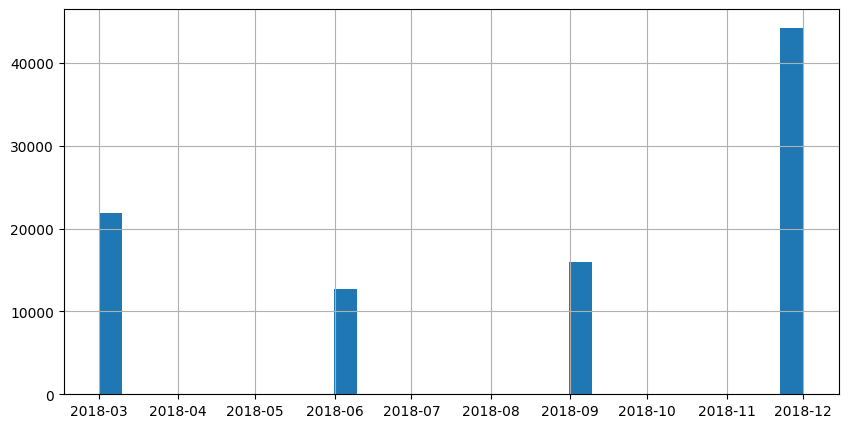

In [20]:
madrid_data['PERIOD'].hist(bins=30, figsize=(10, 5))

## Característica: UNITPRICE

Precio del metro cuadrado. Característica continua.

In [21]:
madrid_data['UNITPRICE'].describe()

count    94815.000000
mean      3661.051534
std       1700.499398
min        805.309735
25%       2240.000000
50%       3480.000000
75%       4744.623034
max       9997.560976
Name: UNITPRICE, dtype: float64

<Axes: >

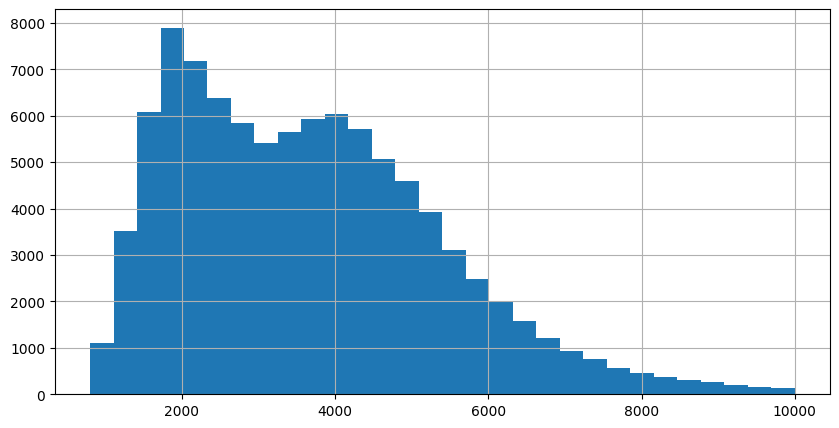

In [22]:
madrid_data['UNITPRICE'].hist(bins=30, figsize=(10, 5))

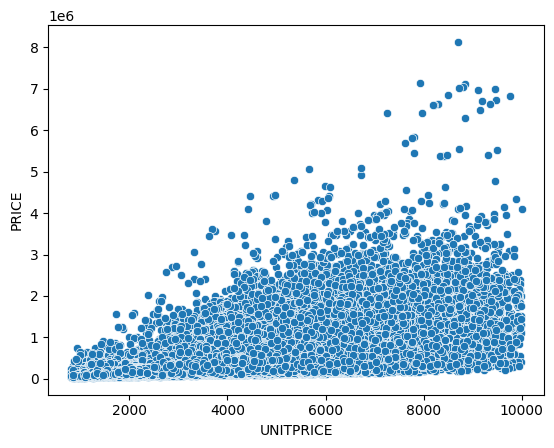

In [23]:
# Relación entre el precio por metro cuadrado (UNITPRICE) y el precio total de la vivienda (PRICE)
sns.scatterplot(x = 'UNITPRICE', y='PRICE',data=madrid_data)
plt.show()

## Característica: ISSTUDIO

Característica categórica binaria.

In [24]:
madrid_data['ISSTUDIO'].value_counts()

ISSTUDIO
0    92203
1     2612
Name: count, dtype: int64

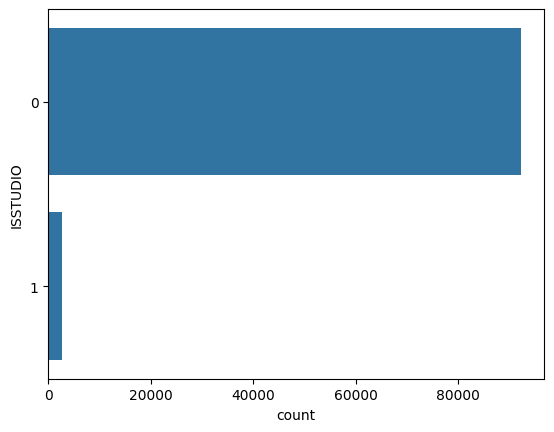

In [25]:
sns.countplot(y = 'ISSTUDIO', data=madrid_data)
plt.show()

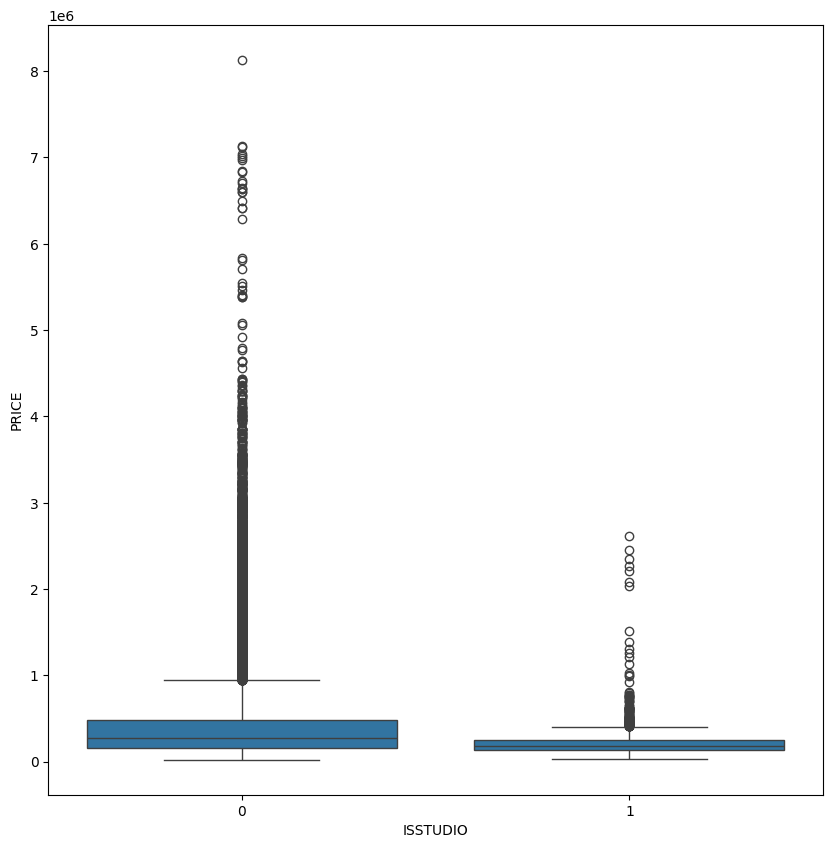

In [26]:
# Relación de si la vivienda es un estudio o no con el precio final de la vivienda
# Diagrama de caja
plt.figure(figsize=(10, 10))
sns.boxplot(x='ISSTUDIO', y='PRICE', data=madrid_data)
plt.show()

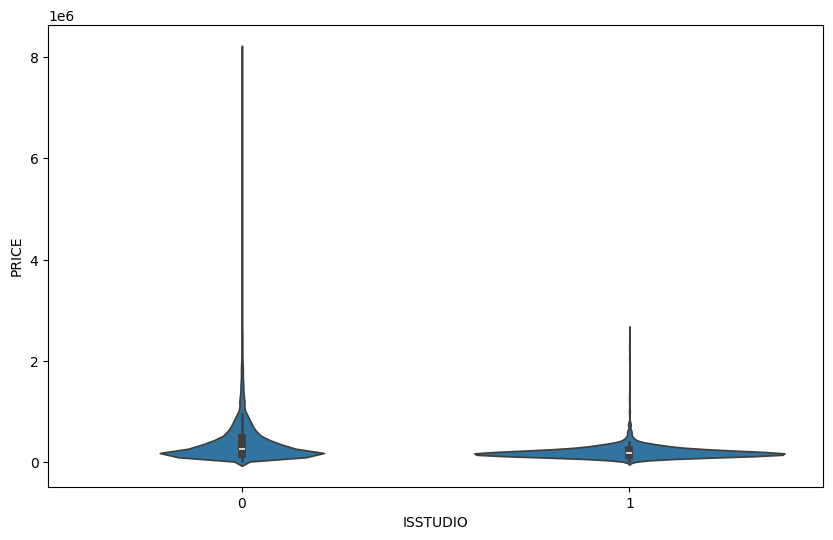

In [27]:
# También lo podemos ver en un gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x='ISSTUDIO', y='PRICE', data=madrid_data)
plt.show()

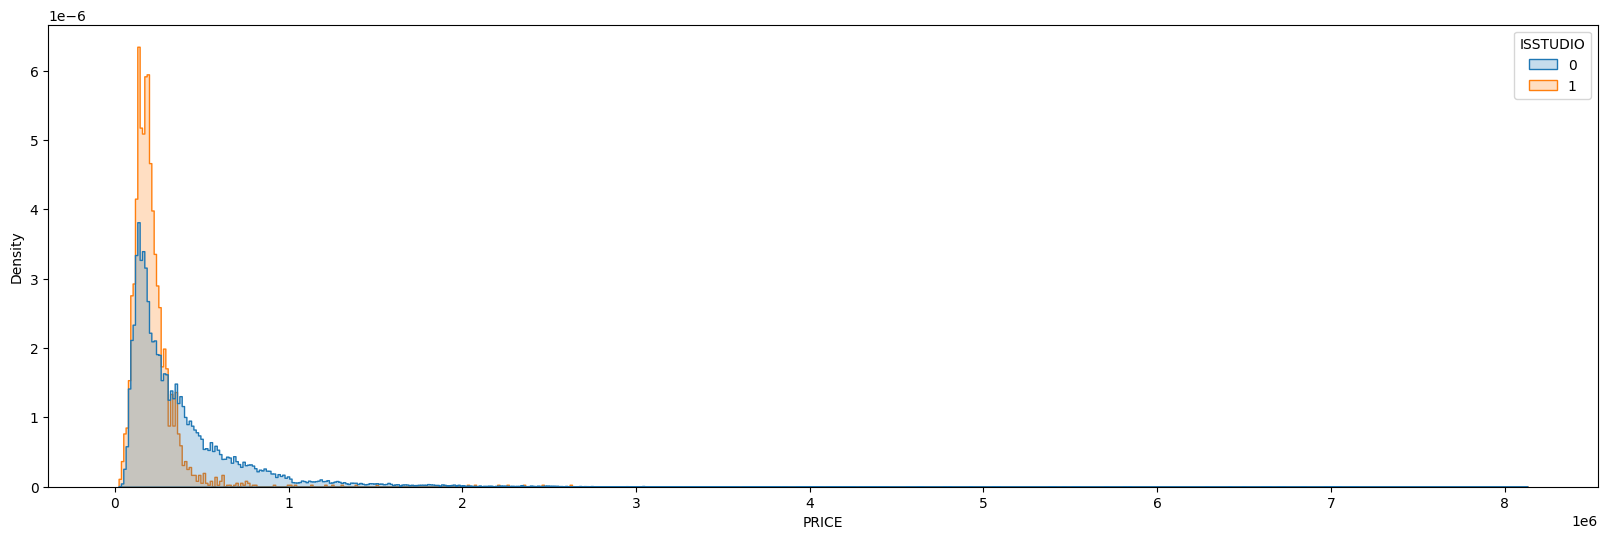

In [28]:
# O con histogramas superpuestos de la función del precio en función de si es o no un estudio
# Histogramas superpuestos
plt.figure(figsize=(20, 6))
sns.histplot(madrid_data, x='PRICE', hue='ISSTUDIO', element='step', stat='density', common_norm=False)
plt.show()

In [29]:
datos_filtrados = madrid_data[(madrid_data['ISSTUDIO'] == 1) & (madrid_data['ROOMNUMBER'] > 0)]
datos_filtrados.sort_values(by='ROOMNUMBER', ascending=False)

ASSETID     PERIOD     PRICE    UNITPRICE  \
31309  A14117032423548931495 2018-12-01  181000.0  1707.547170   
94278  A14117032423548931495 2018-12-01  164000.0  1547.169811   
82129  A14117032423548931495 2018-12-01  172000.0  1622.641509   
21777  A10074503188766990524 2018-12-01  388000.0  3695.238095   
87813  A10201029891049376134 2018-06-01  105000.0  2560.975610   
71839  A12999301785437151708 2018-03-01  280000.0  4057.971014   
24041  A12999301785437151708 2018-03-01  274000.0  3971.014493   
23954  A14425301713066058518 2018-12-01  510000.0  5483.870968   
20103   A7973697447139242106 2018-09-01  198000.0  8250.000000   
16832  A14425301713066058518 2018-12-01  437000.0  3237.037037   
3803    A9669302692829982239 2018-03-01  139000.0  3971.428571   
984       A25229904244651777 2018-03-01  124000.0  3542.857143   
42193  A11639284906335502542 2018-12-01  456000.0  2961.038961   
42177   A9245261362285071266 2018-09-01  351000.0  4280.487805   
29333   A4030678273640619207 2018-12-01  143000.0  2803.921569   
24023   A5075773202190699510 2018-12-01  349000.0  4204.819277   
47757   A3721099021805345255 2018-12-01  922000.0  2936.305732   
42201  A15897762467957686941 2018-06-01  321000.0  4337.837838   
47728   A2590369797413986570 2018-12-01  335000.0  4589.041096   
45903  A12131096982741030722 2018-06-01  104000.0  2810.810811   
63026  A14425301713066058518 2018-12-01  483000.0  3116.129032   
56345   A4314527147966602089 2018-12-01  133000.0  4433.333333   
47767  A15114204831494695014 2018-12-01  465000.0  2906.250000   
74356   A6803620083981788849 2018-12-01  132000.0  2588.235294   
75508  A13514940889705585165 2018-06-01  128000.0  3459.459459   
74508  A14153392932058868741 2018-12-01  143000.0  2803.921569   
87650  A14580201834849960784 2018-12-01  229000.0  1272.222222   
93456   A5277600997055103896 2018-12-01  552000.0  8625.000000   

       CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  \
31309              106           3           1           0        1   
94278              106           3           1           0        1   
82129              106           3           1           0        1   
21777              105           2           2           0        1   
87813               41           2           1           1        1   
71839               69           2           1           1        1   
24041               69           2           1           1        1   
23954               93           1           1           1        1   
20103               24           1           1           0        1   
16832              135           1           1           1        1   
3803                35           1           1           0        0   
984                 35           1           0           0        0   
42193              154           1           1           1        1   
42177               82           1           1           1        1   
29333               51           1           1           0        1   
24023               83           1           1           0        1   
47757              314           1           1           1        1   
42201               74           1           1           0        1   
47728               73           1           1           1        1   
45903               37           1           1           0        1   
63026              155           1           1           1        1   
56345               30           1           1           0        1   
47767              160           1           1           1        1   
74356               51           1           1           0        1   
75508               37           1           1           0        1   
74508               51           1           1           0        1   
87650              180           1           3           0        0   
93456               64           1           2           0        1   

       HASAIRCONDITIONING  ...  CADDWELLINGCOU

Vemos que hay viviendas de 1, 2 y 3 habitaciones consideradas como estudios

## Características categóricas binarias

In [30]:
cat_binarias = ['HASTERRACE','HASLIFT','HASAIRCONDITIONING','HASPARKINGSPACE','ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 'HASEASTORIENTATION',
                'HASWESTORIENTATION', 'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN', 'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3']

In [31]:
len(cat_binarias)

20

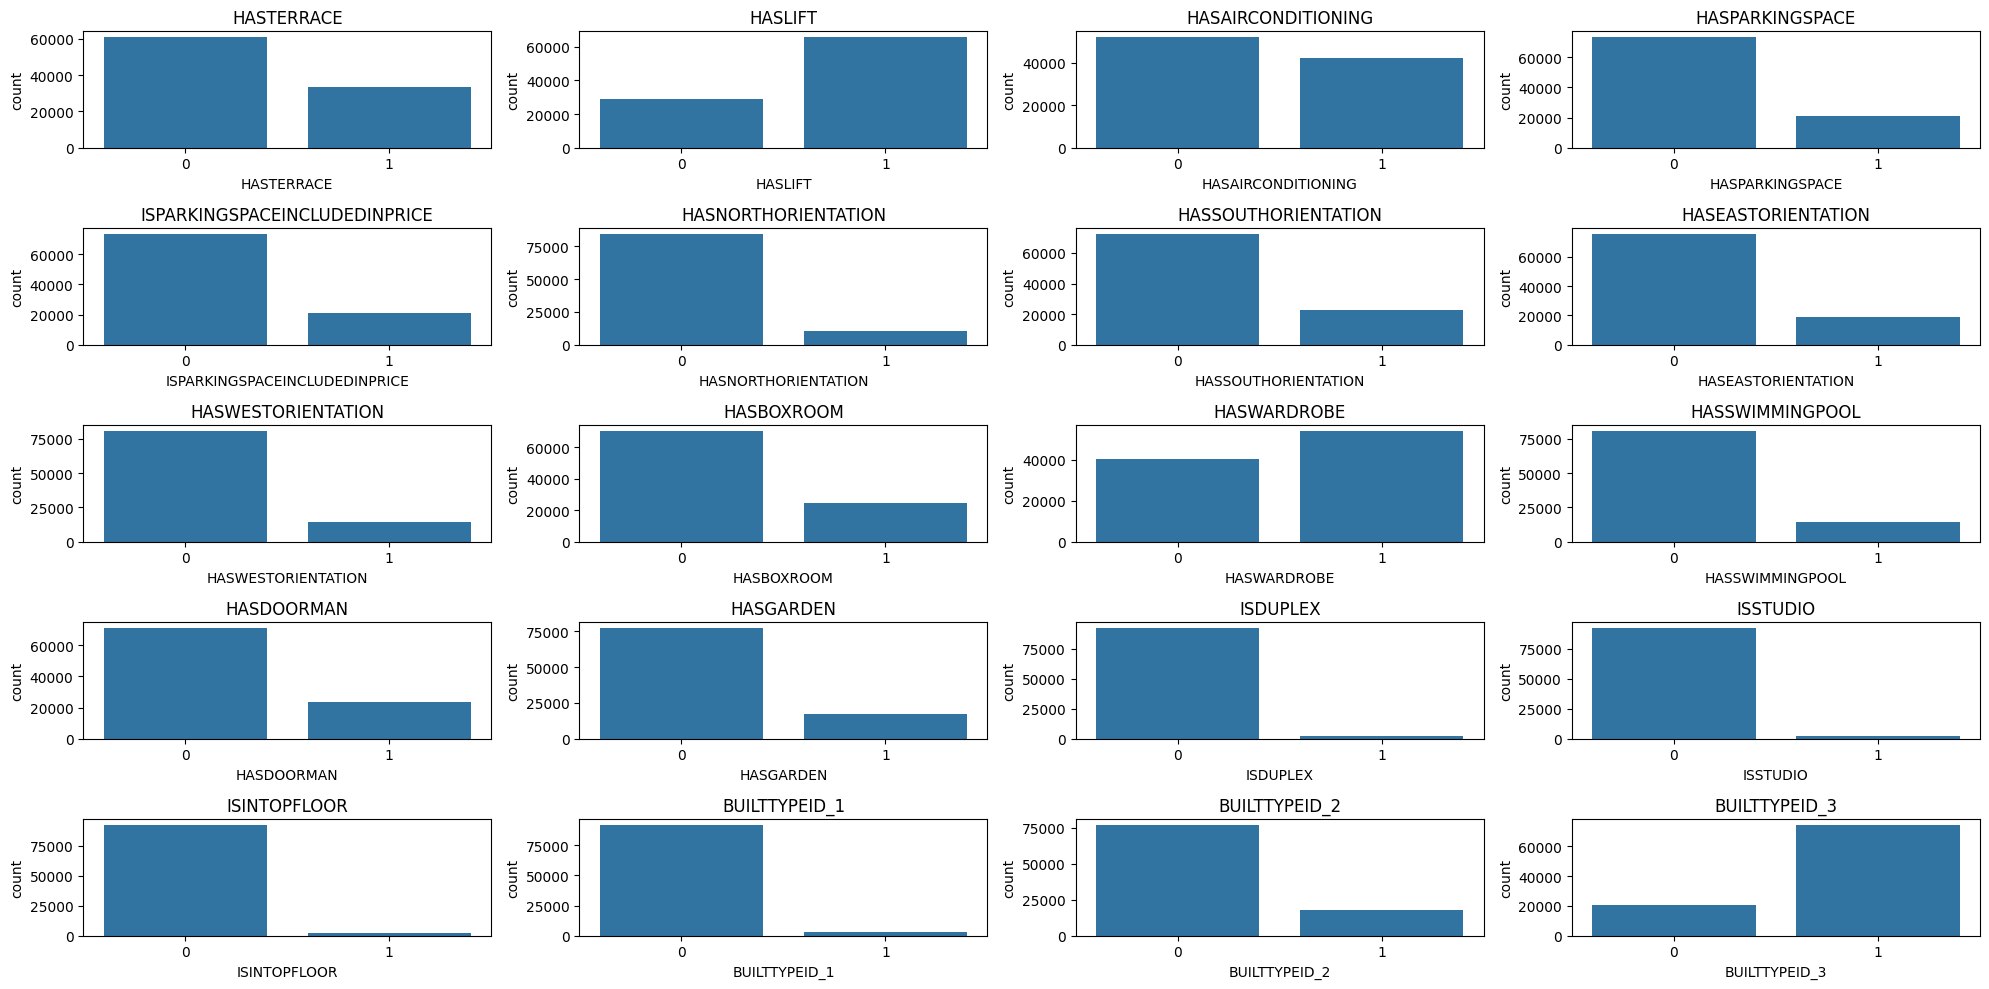

In [32]:
# Configuramos el tamaño de la figura y la cuadrícula de subplots (ajustar según el número de características)
num_carac = len(cat_binarias)
cols = 4  # Número de columnas
filas = (num_carac + cols - 1) // cols  # Número de filas

fig, axes = plt.subplots(filas, cols, figsize=(20, 10))

# Dibujamos el countplot para cada característica en su respectivo subplot
for i, col in enumerate(cat_binarias):
    fila = i // cols
    columna = i % cols
    ax = axes[fila, columna]
    sns.countplot(data=madrid_data, x=col, ax=ax)
    ax.set_title(f'{col}')

# Eliminar los subplots vacíos si es necesario
for j in range(i + 1, filas * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

## Características categóricas no binarias

In [33]:
cat_ordinales = ['ROOMNUMBER','BATHNUMBER', 'FLOORCLEAN', 'CADMAXBUILDINGFLOOR', 'CADASTRALQUALITYID','AMENITYID','FLATLOCATIONID']
len(cat_ordinales)

7

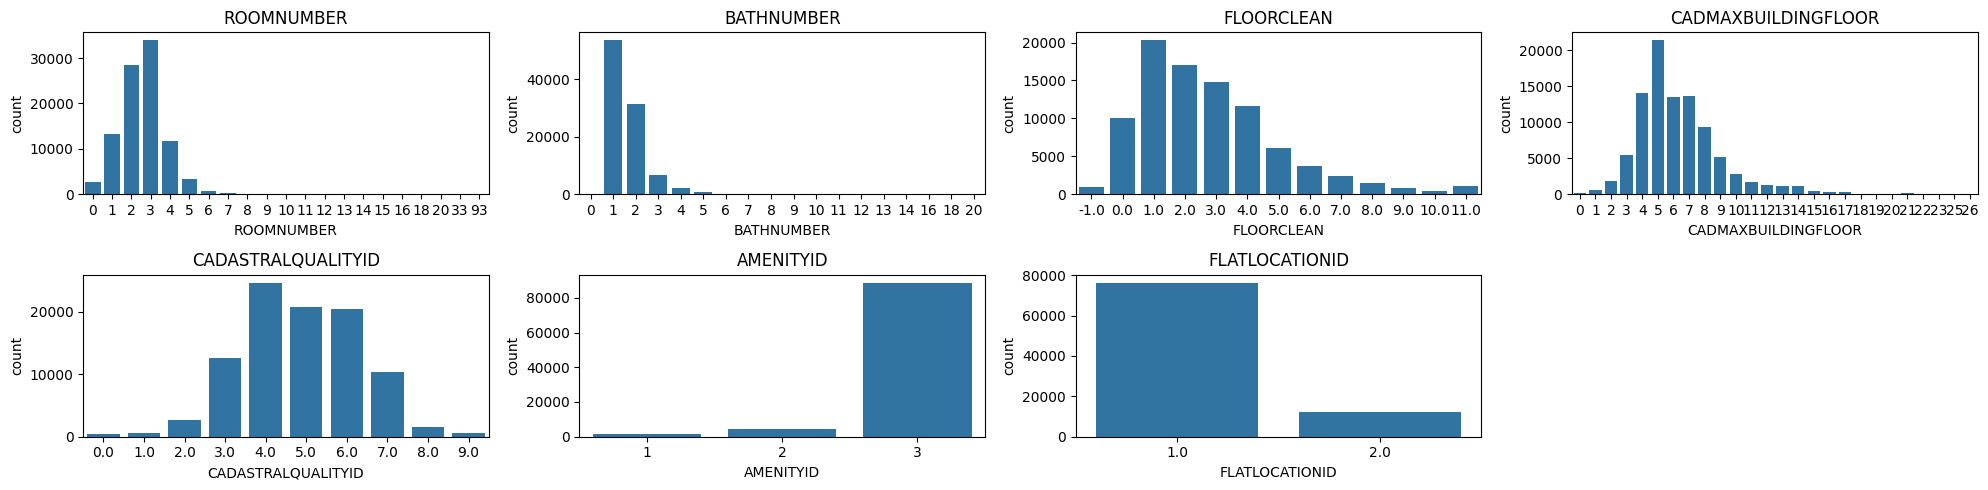

In [34]:
# Configuramos el tamaño de la figura y la cuadrícula de subplots (ajustar según el número de características)
num_carac = len(cat_ordinales)
cols = 4  # Número de columnas
filas = (num_carac + cols - 1) // cols  # Número de filas

fig, axes = plt.subplots(filas, cols, figsize=(20, 5))

# Dibujamos el countplot para cada característica en su respectivo subplot
for i, col in enumerate(cat_ordinales):
    fila = i // cols
    columna = i % cols
    ax = axes[fila, columna]
    sns.countplot(data=madrid_data, x=col, ax=ax)
    ax.set_title(f'{col}')

# Eliminar los subplots vacíos si es necesario
for j in range(i + 1, filas * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

## Características numéricas

In [35]:
numericas = ['PRICE', 'UNITPRICE', 'PARKINGSPACEPRICE', 'CONSTRUCTEDAREA', 'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA', 'CONSTRUCTIONYEAR', 'CADCONSTRUCTIONYEAR', 'CADDWELLINGCOUNT']
len(numericas)

10

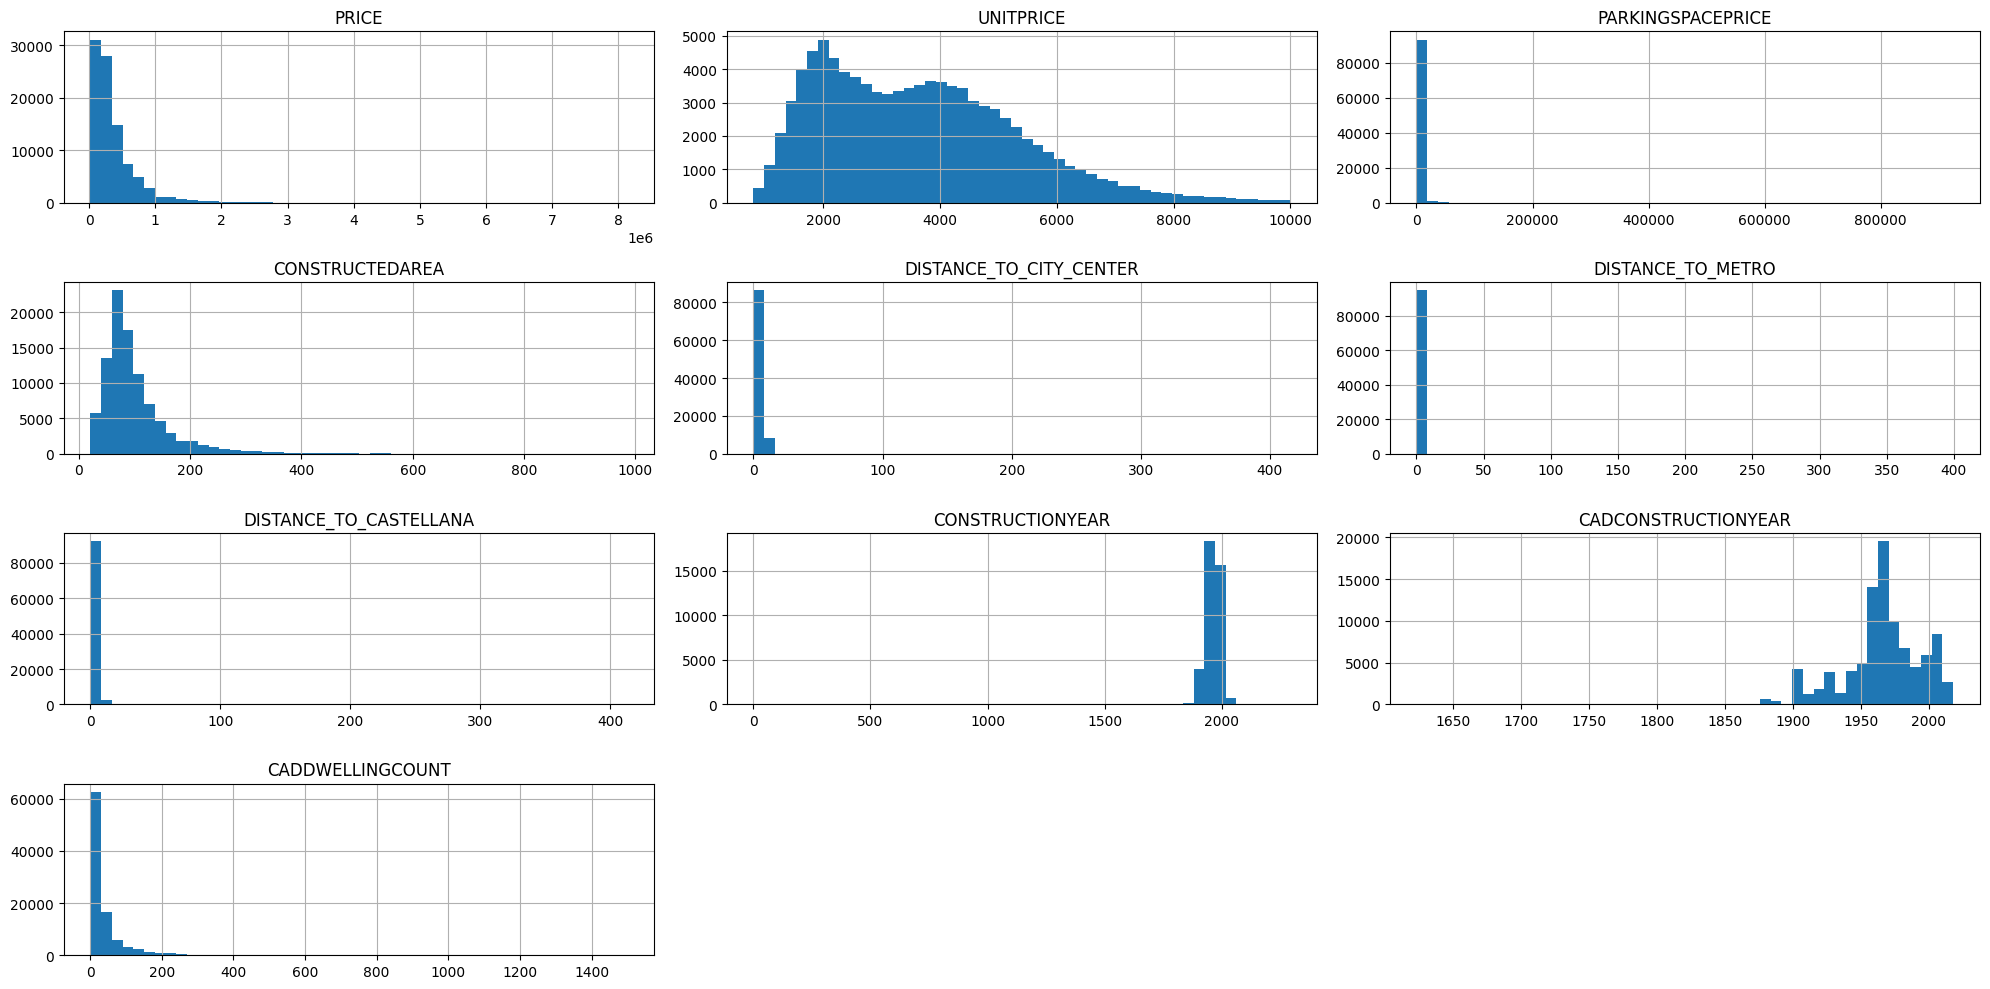

In [36]:
madrid_data[numericas].hist(bins=50, figsize=(20, 10))
plt.tight_layout()
plt.show()

## Características espaciales

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

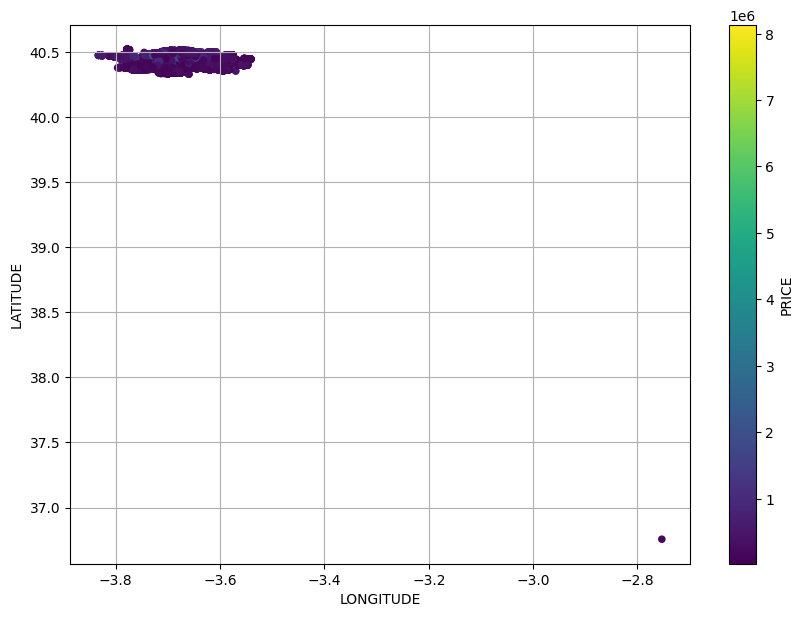

In [37]:
madrid_data.plot(kind="scatter", x="LONGITUDE", y="LATITUDE",c="PRICE",grid=True,figsize=(10, 7))

In [38]:
!pip install --upgrade contextily geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 23.6 MB/s eta 0:00:00


In [39]:
import geopandas as gpd

In [40]:
gdf = gpd.GeoDataFrame(madrid_data, geometry=gpd.points_from_xy(madrid_data['LONGITUDE'], madrid_data['LATITUDE']))
gdf.set_crs(epsg = 4326, inplace=True)

ASSETID     PERIOD     PRICE    UNITPRICE  \
0      A15019136831406238029 2018-03-01  126000.0  2680.851064   
1       A6677225905472065344 2018-03-01  235000.0  4351.851852   
2      A13341979748618524775 2018-03-01  373000.0  4973.333333   
3       A4775182175615276542 2018-03-01  284000.0  5916.666667   
4       A2492087730711701973 2018-03-01  228000.0  4560.000000   
...                      ...        ...       ...          ...   
94810   A3962186799478940177 2018-12-01  347000.0  3017.391304   
94811   A3876164367053781729 2018-12-01  311000.0  3344.086022   
94812  A17768295786772492698 2018-03-01  342000.0  2826.446281   
94813  A15733144649359668635 2018-06-01  146000.0  2354.838710   
94814   A9716488392839016117 2018-12-01  334000.0  3591.397849   

       CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  \
0                   47           1           1           0        1   
1                   54           1           1           0        0   
2                   75           2           1           0        0   
3                   48           1           1           0        1   
4                   50           0           1           0        0   
...                ...         ...         ...         ...      ...   
94810              115           3           2           1        1   
94811               93           2           2           0        1   
94812              121           2           2           1        1   
94813               62           3           1           0        0   
94814               93           3           1           1        1   

       HASAIRCONDITIONING  ...  CADASTRALQUALITYID  BUILTTYPEID_1  \
0                       1  ...                 3.0              0   
1                       0  ...                 3.0              0   
2                       1  ...                 3.0              0   
3                       1  ...                 5.0              0   
4                       0  ...                 7.0              0   
...                   ...  ...                 ...            ...   
94810                   1  ...                 3.0              0   
94811                   1  ...                 3.0              0   
94812                   1  ...                 3.0              0   
94813                   0  ...                 5.0              0   
94814                   1  ...                 5.0              0   

       BUILTTYPEID_2  BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  \
0                  1              0                 8.058429   
1                  0              1                 0.876369   
2                  0              1                 0.907479   
3                  0              1                 0.845462   
4                  0              1                 1.250231   
...              ...            ...                      ...   
94810              0              1                10.003059   
94811              0              1                10.198147   
94812              0              1                11.204027   
94813              0              1                 8.780692   
94814              0              1                11.070417   

       DISTANCE_TO_METRO  DISTANCE_TO_CASTELLANA  LONGITUDE   LATITUDE  \
0               0.872075                6.868677  -3.766933  40.362485   
1               0.116382                1.544125  -3.710725  40.422430   
2               0.139109                1.608444  -3.711571  40.422190   
3               0.144299                1.516166  -3.710440  40.422251   
4               0.337098                1.794136  -3.714340  40.408741   
...                  ...                     ...        ...        ...   
94810           0.866826                8.276950  -3.592154  40.445810   
94811           1.019788                8.496364  -3.589376  40.445013   
94812           1.883650                9.573127  -3.576271  40.443196   
94813           0.171736             

In [41]:
import contextily as ctx

In [42]:
print(gdf.crs.to_string())

EPSG:4326


In [43]:
for provider in ctx.providers:
    print(provider)

OpenStreetMap
MapTilesAPI
OpenSeaMap
OPNVKarte
OpenTopoMap
OpenRailwayMap
OpenFireMap
SafeCast
Stadia
Thunderforest
BaseMapDE
CyclOSM
Jawg
MapBox
MapTiler
TomTom
Esri
OpenWeatherMap
HERE
HEREv3
FreeMapSK
MtbMap
CartoDB
HikeBike
BasemapAT
nlmaps
NASAGIBS
NLS
JusticeMap
GeoportailFrance
OneMapSG
USGS
WaymarkedTrails
OpenAIP
OpenSnowMap
AzureMaps
SwissFederalGeoportal
TopPlusOpen
Gaode
Strava
OrdnanceSurvey


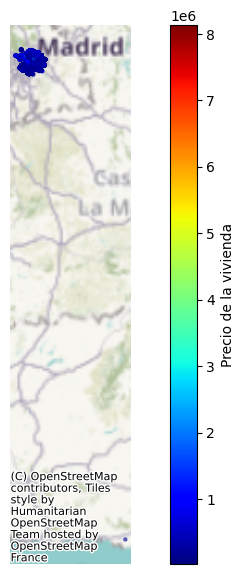

In [44]:
# Dibujamos el GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 7))
gdf.plot(ax=ax, column='PRICE',alpha=0.5,legend=True, legend_kwds={'label': "Precio de la vivienda"},
         cmap='jet', markersize=5)

# Añadimos el mapa base. Fíjate que le hemos pasado el sistema de referencia de nuestro geodataset
try:
  ctx.add_basemap(ax,crs=gdf.crs.to_string(), zoom = 6)
except Exception as e:
    print(f"Error adding basemap: {e}")
    print("Check your internet connection and make sure the CRS of your GeoDataFrame is valid.")

ax.set_axis_off()

plt.show()

### Outliers

In [45]:
def calcula_outliers_IQR(data, carac, distancia):
  IQR = data[carac].quantile(0.75) - data[carac].quantile(0.25)
  limite_inf = data[carac].quantile(0.25) - (IQR*distancia)
  limite_sup = data[carac].quantile(0.75) + (IQR*distancia)
  outliers = (data[carac] > limite_sup) | (data[carac] < limite_inf)
  return outliers

outliers = calcula_outliers_IQR(madrid_data, 'DISTANCE_TO_CITY_CENTER', 2.5)
outliers

0        False
1        False
2        False
3        False
4        False
         ...  
94810    False
94811    False
94812    False
94813    False
94814    False
Name: DISTANCE_TO_CITY_CENTER, Length: 94815, dtype: bool

In [46]:
gdf.loc[outliers,'DISTANCE_TO_CITY_CENTER']

84000    415.752584
Name: DISTANCE_TO_CITY_CENTER, dtype: float64

In [47]:
gdf.loc[outliers,:]

ASSETID     PERIOD     PRICE    UNITPRICE  \
84000  A7501251371917084834 2018-06-01  191000.0  1317.241379   

       CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  \
84000              145           4           2           0        1   

       HASAIRCONDITIONING  ...  CADASTRALQUALITYID  BUILTTYPEID_1  \
84000                   1  ...                 4.0              0   

       BUILTTYPEID_2  BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  \
84000              0              1               415.752584   

       DISTANCE_TO_METRO  DISTANCE_TO_CASTELLANA  LONGITUDE   LATITUDE  \
84000         399.477366              412.803688  -2.753303  36.756391   

                       geometry  
84000  POINT (-2.7533 36.75639)  

[1 rows x 42 columns]

In [48]:
madrid_data_trimmed = gdf.loc[~outliers]

In [49]:
print(madrid_data_trimmed.crs.to_string())

EPSG:4326


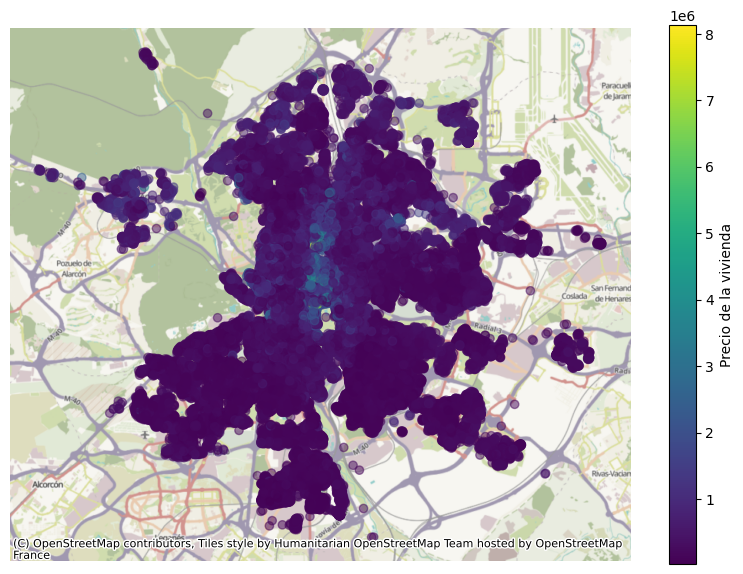

In [50]:
# Dibujamos el GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 7))
madrid_data_trimmed.plot(ax=ax, column='PRICE',alpha=0.5,legend=True, legend_kwds={'label': "Precio de la vivienda"}),

# Añadimos el mapa base. Fíjate que le hemos pasado el sistema de referencia de nuestro geodataset
ctx.add_basemap(ax,crs=madrid_data_trimmed.crs.to_string())

ax.set_axis_off()

plt.show()

In [51]:
madrid_data_trimmed = madrid_data_trimmed[madrid_data_trimmed['PRICE'] < 1e6]

In [52]:
sum(madrid_data['PRICE'] >= 1e6)

5719

In [53]:
pisos_lujo = gdf.loc[~outliers]
pisos_lujo = gdf.loc[gdf['PRICE'] > 2e6]

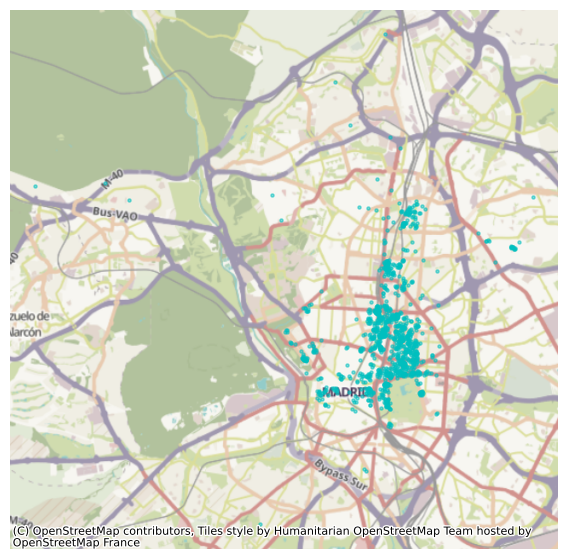

In [54]:
fig, ax = plt.subplots(figsize=(10, 7))
pisos_lujo.plot(ax=ax, color = 'c',alpha=0.5, markersize=5)
ctx.add_basemap(ax,crs=gdf.crs.to_string())

ax.set_axis_off()

plt.show()

In [55]:
viviendas_jardin = madrid_data_trimmed[madrid_data_trimmed['HASGARDEN']==1].copy()

In [56]:
viviendas_jardin['color'] = 'y'

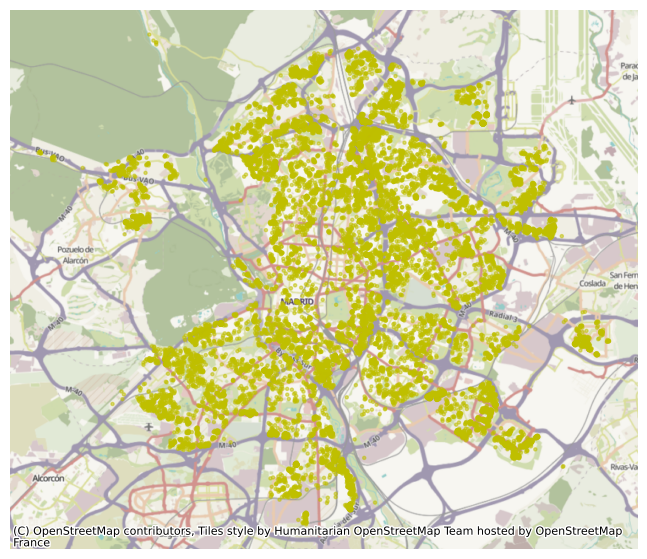

In [57]:
fig, ax = plt.subplots(figsize=(10, 7))
viviendas_jardin.plot(ax=ax, color = viviendas_jardin['color'],alpha=0.5, markersize=5)
ctx.add_basemap(ax,crs=gdf.crs.to_string())

ax.set_axis_off()

plt.show()

# Limpieza del dataset 🧹

## Observaciones "duplicadas" (*ASSETID*)

In [ ]:
median_data_by_asset = madrid_data.groupby('ASSETID').median()

### ¿Qué ha pasado con las características binarias?

In [ ]:
median_data_by_asset['HASEASTORIENTATION'].unique()

array([0. , 0.5, 1. ])

Vemos que aparecen anuncios de viviendas cuya mediana no se corresponde ni con que tiene orientación Este ni con que no la tiene. Tal vez habría que revisar esas observaciones más en profundidad.

In [ ]:
median_data_by_asset[median_data_by_asset['HASEASTORIENTATION'] == 0.5]

PERIOD      PRICE    UNITPRICE  CONSTRUCTEDAREA  \
ASSETID                                                                     
A10001425521130099891 2018-12-01   391500.0  3011.538462            130.0   
A1002338115201630276  2018-12-01   274000.0  2686.274510            102.0   
A10154467689419537778 2018-12-01   332500.0  3325.000000            100.0   
A10667652406261607179 2018-12-01   273500.0  3255.952381             84.0   
A10671846508774637354 2018-12-01   265500.0  3540.000000             75.0   
...                          ...        ...          ...              ...   
A9189575869831281033  2018-12-01   391500.0  3527.027027            111.0   
A9290815797448738761  2018-12-01  3558500.0  7700.000000            467.5   
A9402130416090712075  2018-03-01   340000.0  3400.000000            100.0   
A9716488392839016117  2018-12-01   335000.0  3602.150538             93.0   
A9925055750909739938  2018-03-01   677000.0  4367.741935            155.0   

                       ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  \
ASSETID                                                              
A10001425521130099891         4.0         2.0         1.0      1.0   
A1002338115201630276          3.0         2.0         0.0      1.0   
A10154467689419537778         3.0         2.0         1.0      1.0   
A10667652406261607179         3.0         1.0         1.0      1.0   
A10671846508774637354         3.0         1.0         0.0      1.0   
...                           ...         ...         ...      ...   
A9189575869831281033          3.0         2.0         1.0      1.0   
A9290815797448738761          4.5         5.5         1.0      1.0   
A9402130416090712075          3.0         2.0         1.0      1.0   
A9716488392839016117          3.0         1.0         1.0      1.0   
A9925055750909739938          4.0         2.0         0.5      1.0   

                       HASAIRCONDITIONING  AMENITYID  ...  CADDWELLINGCOUNT  \
ASSETID                                               ...                     
A10001425521130099891                 0.0        3.0  ...              87.0   
A1002338115201630276                  1.0        3.0  ...             201.0   
A10154467689419537778                 1.0        3.0  ...              91.0   
A10667652406261607179                 0.0        3.0  ...              93.0   
A10671846508774637354                 0.0        3.0  ...              22.0   
...                                   ...        ...  ...               ...   
A9189575869831281033                  0.0        2.5  ...              33.0   
A9290815797448738761                  0.5        3.0  ...              23.0   
A9402130416090712075                  1.0        3.0  ...             270.0   
A9716488392839016117                  1.0        3.0  ...             301.0   
A9925055750909739938                  0.5        2.0  ...              27.0   

                       CADASTRALQUALITYID  BUILTTYPEID_1  BUILTTYPEID_2  \
ASSETID                                                                   
A10001425521130099891                 4.0            0.0            0.0   
A1002338115201630276                  4.0            0.0            0.0   
A10154467689419537778                 4.0            0.0            0.0   
A10667652406261607179                 5.0            0.0            1.0   
A10671846508774637354                 5.0            0.0            0.0   
...                                   ...            ...            ...   
A9189575869831281033                  4.0            0.0            0.0   
A9290815797448738761                  4.0            0.0            0.5   
A9402130416090712075                  4.0            0.0            0.0   
A9716488392839016117                  5.0            0.0            0.0   
A9925055750909739938                  3.0            0.0            1.0   

                       BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  \
ASSETID                                     

Hay 112 viviendas en esta situación 😱

Exploramos una...

In [ ]:
madrid_data.loc[madrid_data.ASSETID == 'A9716488392839016117',['HASNORTHORIENTATION','HASSOUTHORIENTATION','HASEASTORIENTATION','HASWESTORIENTATION']]

HASNORTHORIENTATION  HASSOUTHORIENTATION  HASEASTORIENTATION  \
24665                    1                    0                   1   
90887                    1                    0                   0   
94637                    1                    0                   0   
94814                    1                    0                   1   

       HASWESTORIENTATION  
24665                   0  
90887                   0  
94637                   0  
94814                   0

Vemos que en este ejemplo concreto es un error y que la vivienda tiene orientación norte.

Lo mismo podría estar sucediendo con el resto de características categóricas binarias.

En este caso decidimos que si el valor mediano no se decide ni por una posibilidad ni por la otra, lo consideraremos como verdadero (`False`).

⚠️ Estamos introduciendo error ya que como hemos visto en el caso de la orientación son datos potencialmemte erróneos. Podríamos implementar una manera de mejorar esta aproximación a partir del valor de otras características.

In [ ]:
median_data_by_asset[cat_binarias] = (median_data_by_asset[cat_binarias] < 0.5).astype(int)

In [ ]:
median_data_by_asset['HASEASTORIENTATION'].unique()

array([1, 0])

### ¿Y con las características categóricas ordinales?

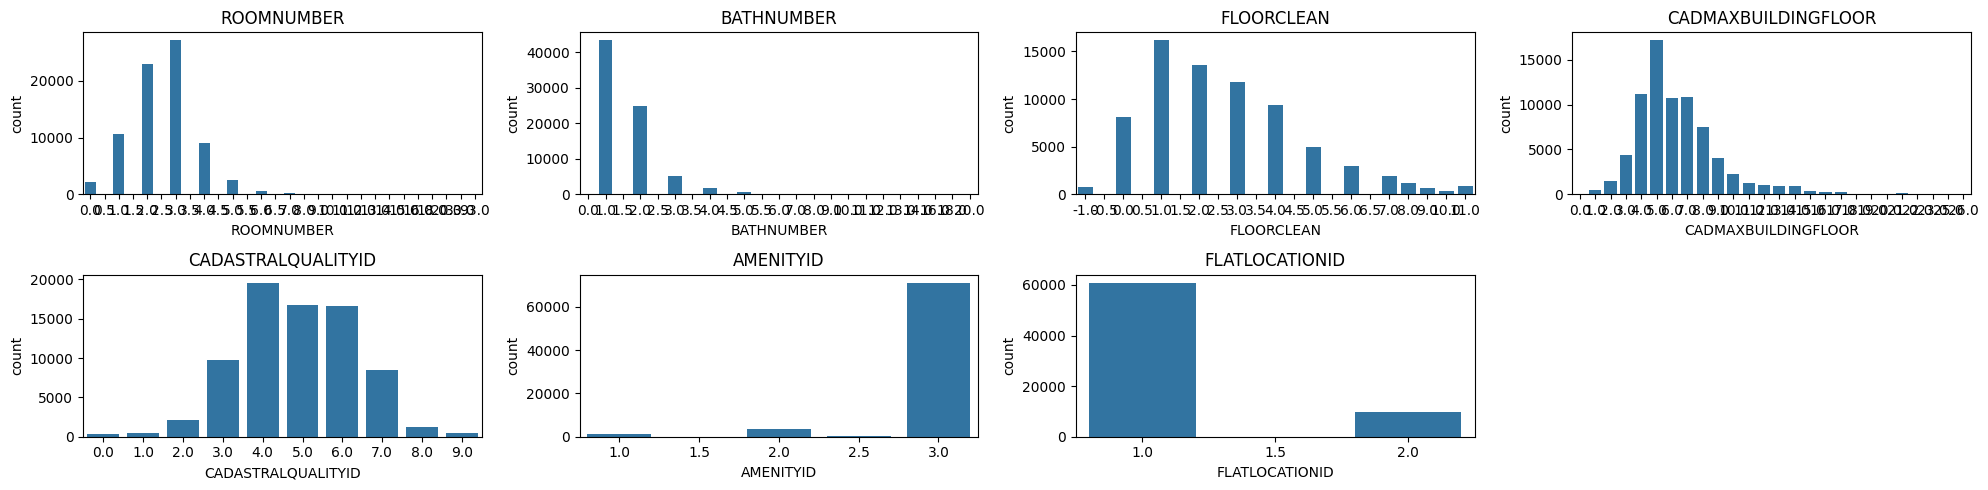

In [ ]:
# Configuramos el tamaño de la figura y la cuadrícula de subplots (ajustar según el número de características)
num_carac = len(cat_ordinales)
cols = 4  # Número de columnas
filas = (num_carac + cols - 1) // cols  # Número de filas

fig, axes = plt.subplots(filas, cols, figsize=(20, 5))

# Dibujamos el countplot para cada característica en su respectivo subplot
for i, col in enumerate(cat_ordinales):
    fila = i // cols
    columna = i % cols
    ax = axes[fila, columna]
    sns.countplot(data=median_data_by_asset, x=col, ax=ax)
    ax.set_title(f'{col}')

# Eliminamos los subplots vacíos si es necesario
for j in range(i + 1, filas * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
median_data_by_asset[cat_ordinales] = median_data_by_asset[cat_ordinales].round()

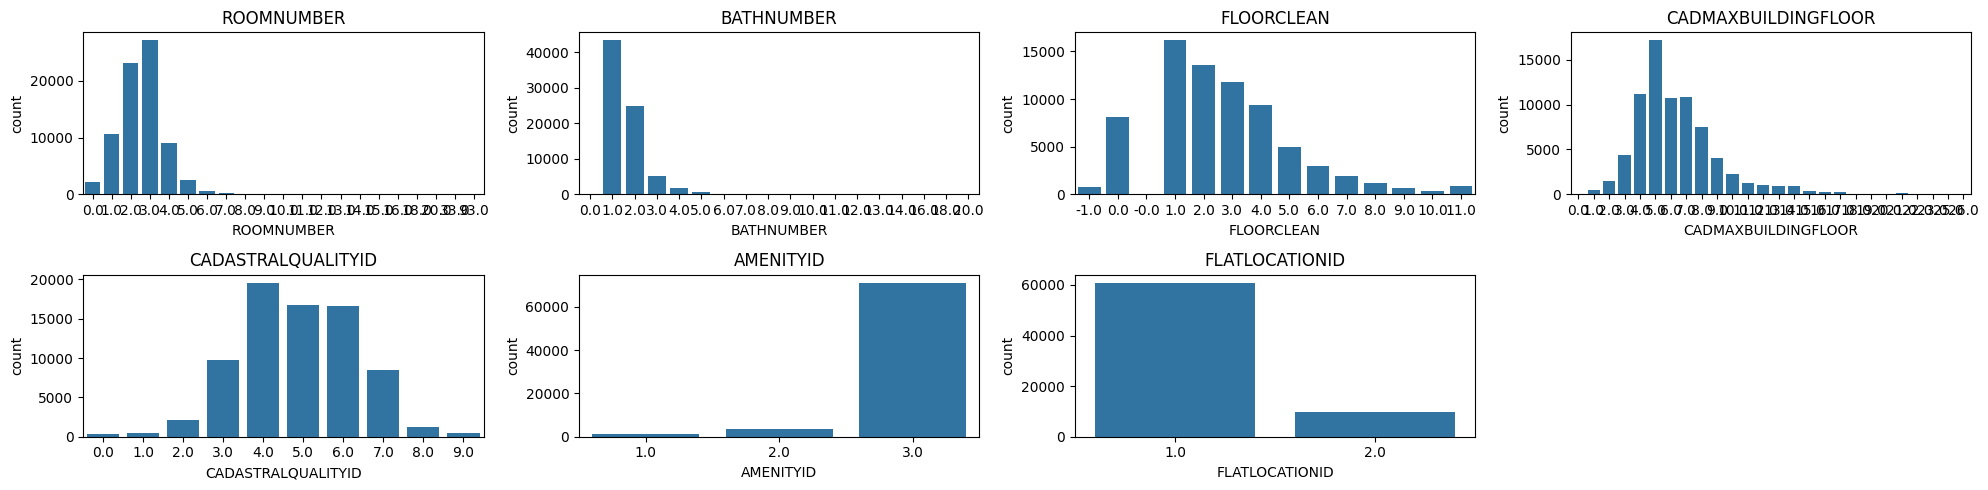

In [ ]:
# Configuramos el tamaño de la figura y la cuadrícula de subplots (ajustar según el número de características)
num_carac = len(cat_ordinales)
cols = 4  # Número de columnas
filas = (num_carac + cols - 1) // cols  # Número de filas

fig, axes = plt.subplots(filas, cols, figsize=(20, 5))

# Dibujamos el countplot para cada característica en su respectivo subplot
for i, col in enumerate(cat_ordinales):
    fila = i // cols
    columna = i % cols
    ax = axes[fila, columna]
    sns.countplot(data=median_data_by_asset, x=col, ax=ax)
    ax.set_title(f'{col}')

# Eliminar los subplots vacíos si es necesario
for j in range(i + 1, filas * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [ ]:
madrid_data['FLOORCLEAN'].value_counts()

FLOORCLEAN
 1.0     20336
 2.0     17044
 3.0     14754
 4.0     11635
 0.0     10112
 5.0      6162
 6.0      3733
 7.0      2447
 8.0      1495
 11.0     1051
-1.0       936
 9.0       814
 10.0      450
Name: count, dtype: int64

In [ ]:
median_data_by_asset['FLOORCLEAN'].value_counts()

FLOORCLEAN
 1.0     16196
 2.0     13614
 3.0     11803
 4.0      9405
 0.0      8149
 5.0      4908
 6.0      2989
 7.0      1941
 8.0      1188
 11.0      829
-1.0       749
 9.0       647
 10.0      352
Name: count, dtype: int64

<Axes: xlabel='FLOORCLEAN', ylabel='count'>

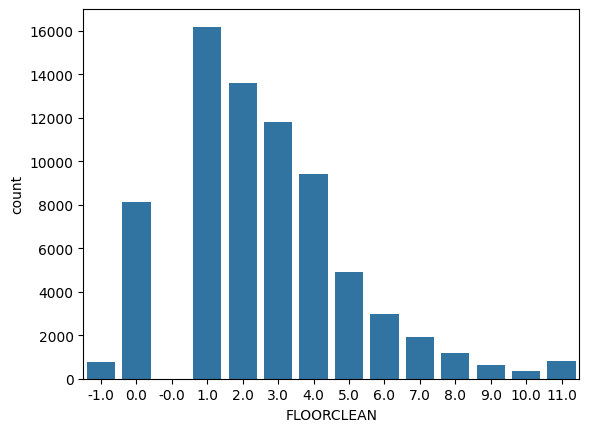

In [ ]:
sns.countplot(data=median_data_by_asset, x='FLOORCLEAN')

## Eliminar características

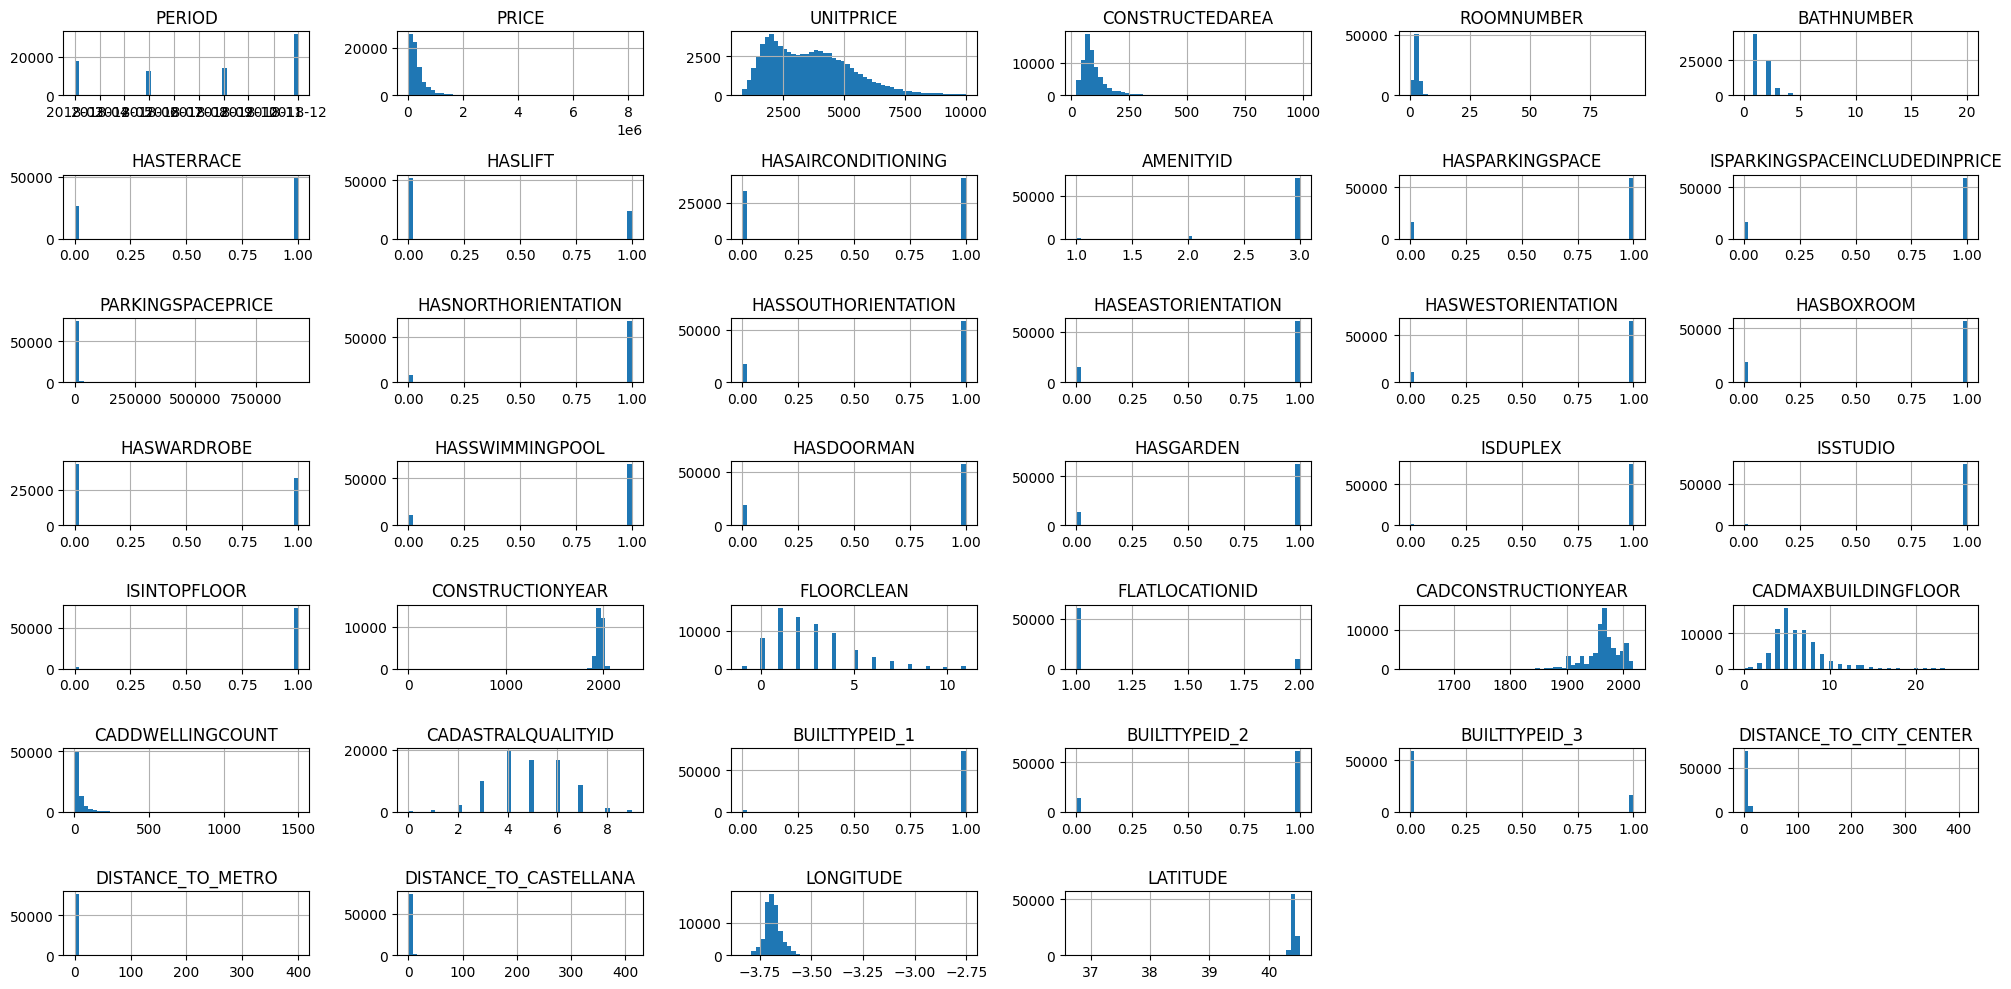

In [ ]:
median_data_by_asset.hist(bins=50, figsize=(20, 10))
plt.tight_layout()
plt.show()

### Eliminar del dataset ASSETID

In [ ]:
median_data_by_asset.reset_index(inplace=True)

In [ ]:
median_data_by_asset.drop('ASSETID', axis=1, inplace=True)

### Data leakage
- Eliminar las características que filtran la variable objetivo y no vamos a tener en el momento de la predicción: `UNITPRICE`

In [ ]:
median_data_by_asset.drop('UNITPRICE', axis=1, inplace=True)

### Características poco informativas o muy correladas
- `PERIOD`
- `AMENITYID`
- `FLATLOCATIONID`
- `CONSTRUCTIONYEAR`
- `ISSTUDIO`

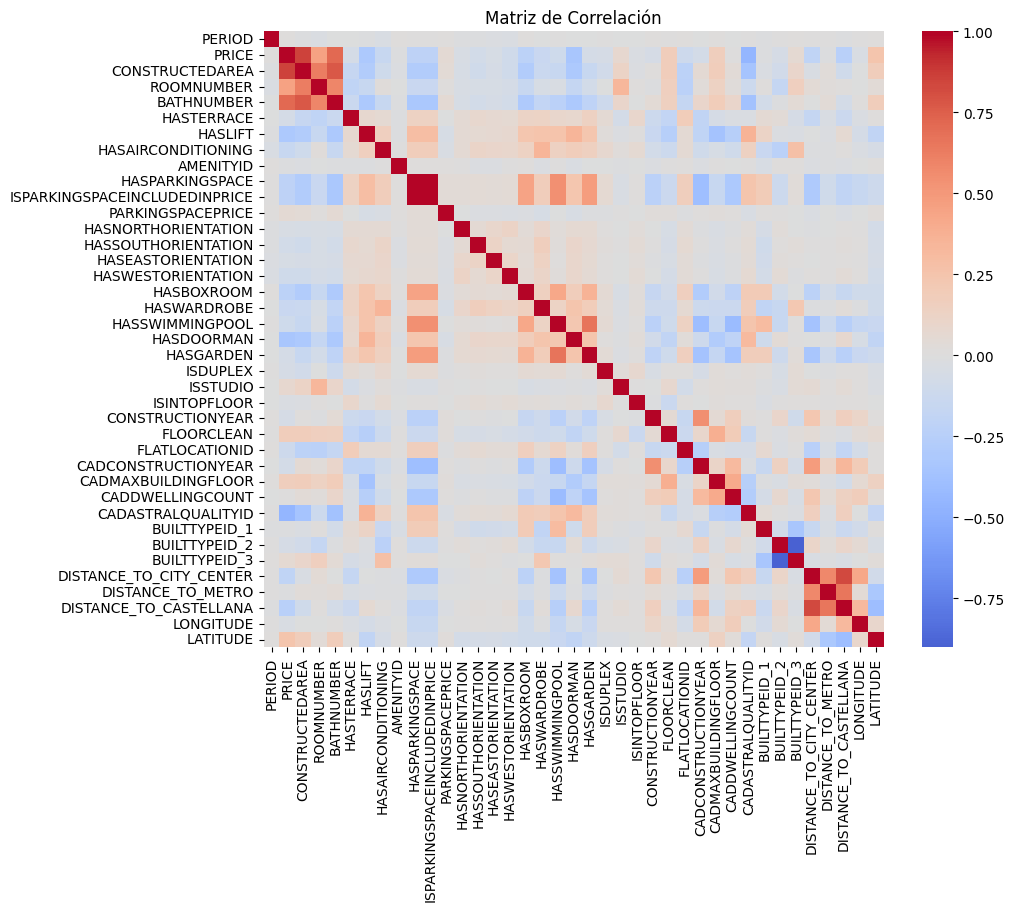

In [ ]:
correlation_matrix = median_data_by_asset.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
correlation_matrix['PRICE'].sort_values(ascending=False)

PRICE                            1.000000
CONSTRUCTEDAREA                  0.856418
BATHNUMBER                       0.712449
ROOMNUMBER                       0.453594
LATITUDE                         0.244460
FLOORCLEAN                       0.176180
CADMAXBUILDINGFLOOR              0.164256
ISSTUDIO                         0.071524
BUILTTYPEID_3                    0.061065
PARKINGSPACEPRICE                0.050817
PERIOD                           0.016891
CADDWELLINGCOUNT                -0.000561
DISTANCE_TO_METRO               -0.011274
AMENITYID                       -0.011770
BUILTTYPEID_1                   -0.013269
ISINTOPFLOOR                    -0.028051
LONGITUDE                       -0.035018
HASNORTHORIENTATION             -0.046952
HASEASTORIENTATION              -0.053958
CONSTRUCTIONYEAR                -0.056961
ISDUPLEX                        -0.058779
BUILTTYPEID_2                   -0.059447
HASTERRACE                      -0.063804
HASGARDEN                       -0.069439
CADCONSTRUCTIONYEAR             -0.074295
HASSOUTHORIENTATION             -0.082927
HASWESTORIENTATION              -0.095023
HASSWIMMINGPOOL                 -0.101012
FLATLOCATIONID                  -0.108153
HASWARDROBE                     -0.139899
HASAIRCONDITIONING              -0.146661
DISTANCE_TO_CITY_CENTER         -0.198301
ISPARKINGSPACEINCLUDEDINPRICE   -0.216748
HASPARKINGSPACE                 -0.216748
HASBOXROOM                      -0.221967
DISTANCE_TO_CASTELLANA          -0.243213
HASLIFT                         -0.315266
HASDOORMAN                      -0.344748
CADASTRALQUALITYID              -0.454368
Name: PRICE, dtype: float64

In [ ]:
estudios = median_data_by_asset[median_data_by_asset['ISSTUDIO'] == 0]
estudios['ROOMNUMBER'].value_counts()

ROOMNUMBER
0.0    2036
1.0      21
2.0       6
3.0       1
Name: count, dtype: int64

⚠️ La característica `ISSTUDIO` podría estar incluso introduciendo ruido al modelo ya que hay "estudios" con 3 habitaciones.

Atención porque al contrario de lo que podríamos intuir, cuando la vivienda es un estudio `ISSTUDIO`= 0 aparentemente.

In [ ]:
correlation_matrix["HASPARKINGSPACE"].sort_values(ascending=False)

HASPARKINGSPACE                  1.000000
ISPARKINGSPACEINCLUDEDINPRICE    1.000000
HASSWIMMINGPOOL                  0.546105
HASGARDEN                        0.479154
HASBOXROOM                       0.449646
HASLIFT                          0.292906
CADASTRALQUALITYID               0.245571
HASDOORMAN                       0.236102
BUILTTYPEID_1                    0.196415
HASWARDROBE                      0.182355
HASAIRCONDITIONING               0.174008
FLATLOCATIONID                   0.166490
HASTERRACE                       0.132761
ISDUPLEX                         0.062799
HASSOUTHORIENTATION              0.048451
HASWESTORIENTATION               0.046825
HASNORTHORIENTATION              0.041371
PARKINGSPACEPRICE                0.041338
HASEASTORIENTATION               0.039179
BUILTTYPEID_3                    0.027920
ISINTOPFLOOR                     0.018471
AMENITYID                        0.014168
PERIOD                           0.002372
ISSTUDIO                        -0.035897
DISTANCE_TO_METRO               -0.098455
LATITUDE                        -0.109480
BUILTTYPEID_2                   -0.118229
FLOORCLEAN                      -0.128429
ROOMNUMBER                      -0.140401
CADMAXBUILDINGFLOOR             -0.145250
LONGITUDE                       -0.149485
DISTANCE_TO_CASTELLANA          -0.191453
PRICE                           -0.216748
CONSTRUCTIONYEAR                -0.231551
CONSTRUCTEDAREA                 -0.281308
DISTANCE_TO_CITY_CENTER         -0.299689
CADDWELLINGCOUNT                -0.317694
BATHNUMBER                      -0.325795
CADCONSTRUCTIONYEAR             -0.394330
Name: HASPARKINGSPACE, dtype: float64

In [ ]:
correlation_matrix['BUILTTYPEID_2'].sort_values(ascending=False)

BUILTTYPEID_2                    1.000000
CADCONSTRUCTIONYEAR              0.138784
DISTANCE_TO_CITY_CENTER          0.101706
CONSTRUCTIONYEAR                 0.097811
DISTANCE_TO_CASTELLANA           0.095066
CADDWELLINGCOUNT                 0.073673
LONGITUDE                        0.049788
HASDOORMAN                       0.046428
HASWESTORIENTATION               0.044086
HASTERRACE                       0.035311
DISTANCE_TO_METRO                0.033989
HASNORTHORIENTATION              0.032941
HASEASTORIENTATION               0.025388
HASSOUTHORIENTATION              0.009218
AMENITYID                        0.006298
ISINTOPFLOOR                     0.003804
PARKINGSPACEPRICE                0.002611
CADASTRALQUALITYID               0.001221
PERIOD                          -0.000922
BATHNUMBER                      -0.010648
HASLIFT                         -0.020848
FLOORCLEAN                      -0.022682
FLATLOCATIONID                  -0.030206
CADMAXBUILDINGFLOOR             -0.037381
ISSTUDIO                        -0.039660
LATITUDE                        -0.040494
ISDUPLEX                        -0.050336
PRICE                           -0.059447
HASBOXROOM                      -0.079486
BUILTTYPEID_1                   -0.087213
CONSTRUCTEDAREA                 -0.088764
HASGARDEN                       -0.110099
HASPARKINGSPACE                 -0.118229
ISPARKINGSPACEINCLUDEDINPRICE   -0.118229
HASSWIMMINGPOOL                 -0.144178
HASWARDROBE                     -0.150767
ROOMNUMBER                      -0.171992
HASAIRCONDITIONING              -0.228828
BUILTTYPEID_3                   -0.901986
Name: BUILTTYPEID_2, dtype: float64

`HASPARKINGSPACE` y `ISPARKINGSPACEINCLUDEDINPRICE` tienen una correlación directa elevada.

Lo mismo pasa con `BUILTTYPEID_2` y `BUILTTYPEID_3`, en este caso con correlación inversa.

#### `PARKINGSPACEPRICE`

In [ ]:
median_data_by_asset['PARKINGSPACEPRICE'].value_counts()

PARKINGSPACEPRICE
1.0         74128
20001.0       167
30001.0       156
15001.0       146
25001.0       133
            ...  
1001.0          1
58001.0         1
220001.0        1
41001.0         1
450001.0        1
Name: count, Length: 154, dtype: int64

In [ ]:
median_data_by_asset['ISPARKINGSPACEINCLUDEDINPRICE'].value_counts()

ISPARKINGSPACEINCLUDEDINPRICE
1    59240
0    16564
Name: count, dtype: int64

Podríamos pensar que las viviendas que tienen el precio del garaje incluido en el precio toman el valor `PARKINGSPACEPRICE` = 1.0. Vamos a comprobarlo...

In [ ]:
median_data_by_asset.loc[median_data_by_asset['ISPARKINGSPACEINCLUDEDINPRICE'] == 0, 'PARKINGSPACEPRICE'].value_counts()

PARKINGSPACEPRICE
1.0         16509
10001.0         8
15001.0         8
22501.0         5
20001.0         4
25001.0         3
17501.0         3
12501.0         3
2501.0          2
9001.0          2
27501.0         2
5001.0          2
8501.0          1
50001.0         1
4001.0          1
3001.0          1
220001.0        1
14501.0         1
14001.0         1
8751.0          1
75001.0         1
24001.0         1
30001.0         1
8251.0          1
66.0            1
Name: count, dtype: int64

In [ ]:
median_data_by_asset.loc[median_data_by_asset['ISPARKINGSPACEINCLUDEDINPRICE'] == 1, 'PARKINGSPACEPRICE'].value_counts()

PARKINGSPACEPRICE
1.0         57619
20001.0       163
30001.0       155
15001.0       138
25001.0       130
            ...  
1001.0          1
58001.0         1
41001.0         1
4001.0          1
450001.0        1
Name: count, Length: 148, dtype: int64

<Axes: >

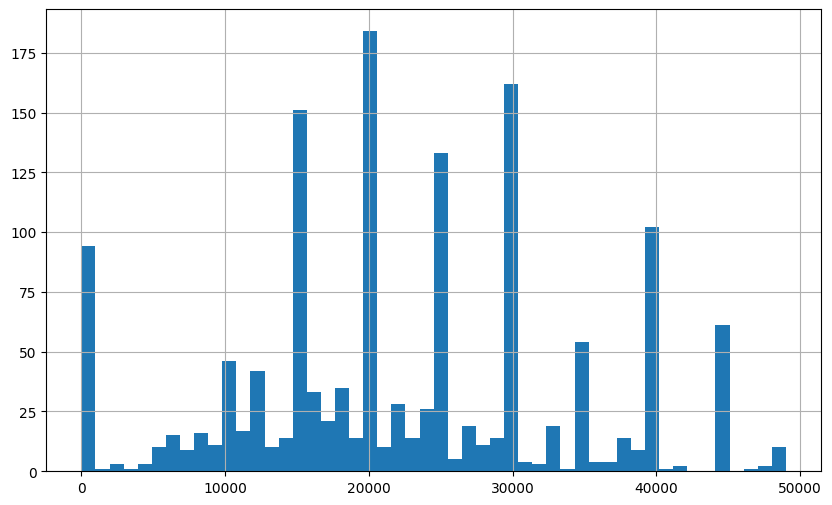

In [ ]:
# Vemos los valores de la variable 'PARKINGSPACEPRICE'
aux = median_data_by_asset[(median_data_by_asset['PARKINGSPACEPRICE']>1.0) & (median_data_by_asset['PARKINGSPACEPRICE']<50000)]

# Graficar la distribución
plt.figure(figsize=(10, 6))
aux['PARKINGSPACEPRICE'].hist(bins=50)

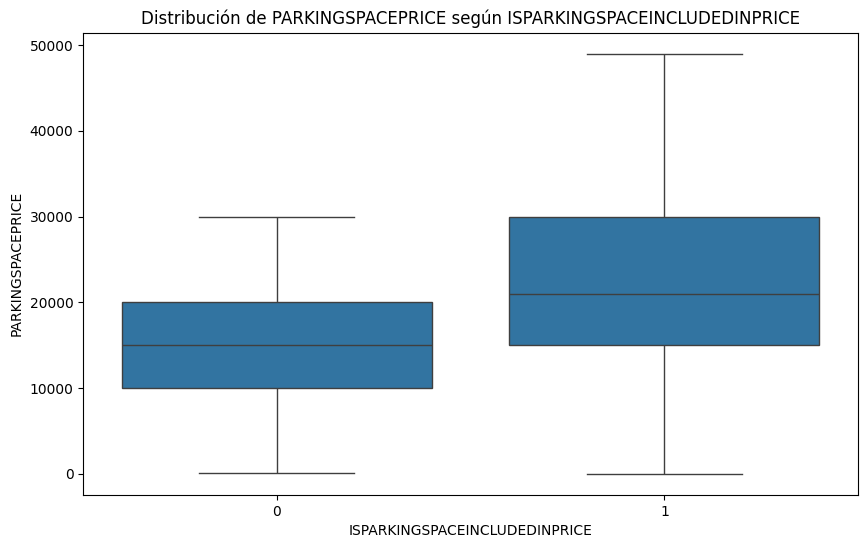

In [ ]:
# Crear un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ISPARKINGSPACEINCLUDEDINPRICE', y='PARKINGSPACEPRICE', data=aux)
plt.title('Distribución de PARKINGSPACEPRICE según ISPARKINGSPACEINCLUDEDINPRICE')
plt.xlabel('ISPARKINGSPACEINCLUDEDINPRICE')
plt.ylabel('PARKINGSPACEPRICE')
plt.show()

Parece una característica confusa. Sin más información tal vez sea mejor eliminarla....

In [ ]:
median_data_by_asset.drop(['PERIOD', 'AMENITYID', 'FLATLOCATIONID', 'CONSTRUCTIONYEAR', 'ISSTUDIO','PARKINGSPACEPRICE'], axis=1, inplace=True)

In [ ]:
median_data_by_asset.head()

PRICE  CONSTRUCTEDAREA  ROOMNUMBER  BATHNUMBER  HASTERRACE  HASLIFT  \
0  255000.0             97.0         3.0         2.0           1        0   
1   82000.0             62.0         2.0         1.0           1        0   
2  133000.0             67.0         3.0         1.0           0        1   
3  204000.0            180.0         3.0         2.0           1        0   
4  161000.0             54.0         2.0         1.0           1        1   

   HASAIRCONDITIONING  HASPARKINGSPACE  ISPARKINGSPACEINCLUDEDINPRICE  \
0                   1                1                              1   
1                   1                1                              1   
2                   0                1                              1   
3                   0                1                              1   
4                   0                1                              1   

   HASNORTHORIENTATION  ...  CADDWELLINGCOUNT  CADASTRALQUALITYID  \
0                    1  ...               8.0                 6.0   
1                    1  ...              11.0                 7.0   
2                    1  ...              17.0                 7.0   
3                    1  ...              13.0                 6.0   
4                    1  ...               7.0                 6.0   

   BUILTTYPEID_1  BUILTTYPEID_2  BUILTTYPEID_3  DISTANCE_TO_CITY_CENTER  \
0              1              1              0                 7.829495   
1              1              0              1                 6.435241   
2              1              1              0                 4.836415   
3              1              1              0                 4.664784   
4              1              1              0                 4.063119   

   DISTANCE_TO_METRO  DISTANCE_TO_CASTELLANA  LONGITUDE   LATITUDE  
0           0.254412                3.027988  -3.650253  40.473921  
1           0.268472                4.693939  -3.640243  40.384968  
2           1.061146                2.623258  -3.665263  40.384547  
3           0.427977                3.131739  -3.651790  40.430336  
4           0.377045                2.702218  -3.725637  40.384103  

[5 rows x 33 columns]

# Preprocesado de datos

## 1. Dividir conjunto de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(median_data_by_asset, test_size=0.2)

## 2. Valores faltantes

Text(0.5, 0, 'Características')

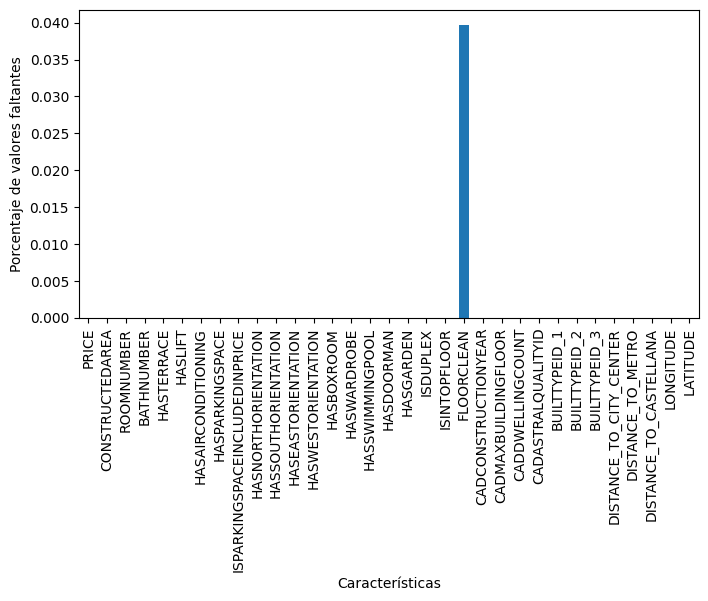

In [ ]:
(train_set
 .isnull()
 .mean()
 .plot.bar(figsize=(8,4)))
plt.ylabel('Porcentaje de valores faltantes')
plt.xlabel('Características')

In [ ]:
#@title Valores faltantes con Pandas
valor_imp =  {}
for carac in ['FLOORCLEAN','CADASTRALQUALITYID']:
  valor_imp[carac] = train_set[carac].mode()[0]
  train_set[carac] = train_set[carac].fillna(valor_imp[carac])

train_set.isnull().sum()

PRICE                            0
CONSTRUCTEDAREA                  0
ROOMNUMBER                       0
BATHNUMBER                       0
HASTERRACE                       0
HASLIFT                          0
HASAIRCONDITIONING               0
HASPARKINGSPACE                  0
ISPARKINGSPACEINCLUDEDINPRICE    0
HASNORTHORIENTATION              0
HASSOUTHORIENTATION              0
HASEASTORIENTATION               0
HASWESTORIENTATION               0
HASBOXROOM                       0
HASWARDROBE                      0
HASSWIMMINGPOOL                  0
HASDOORMAN                       0
HASGARDEN                        0
ISDUPLEX                         0
ISINTOPFLOOR                     0
FLOORCLEAN                       0
CADCONSTRUCTIONYEAR              0
CADMAXBUILDINGFLOOR              0
CADDWELLINGCOUNT                 0
CADASTRALQUALITYID               0
BUILTTYPEID_1                    0
BUILTTYPEID_2                    0
BUILTTYPEID_3                    0
DISTANCE_TO_CITY_CENTER          0
DISTANCE_TO_METRO                0
DISTANCE_TO_CASTELLANA           0
LONGITUDE                        0
LATITUDE                         0
dtype: int64

## 3. Outliers
- `ROOMNUMBER`
- `BATHNUMBER`
- `DISTANCE_TO_CITY_CENTER`
- `PRICE`
- `PARKINGSPACEPRICE`
- `CONSTRUCTEDAREA`
- `CADCONSTRUCTIONYEAR`
- `CADDWELLINGCOUNT`

In [ ]:
carac_outliers = [
    'ROOMNUMBER',
    'BATHNUMBER',
    'PRICE',
    'DISTANCE_TO_CITY_CENTER',
    'CONSTRUCTEDAREA',
    'CADCONSTRUCTIONYEAR',
    'CADDWELLINGCOUNT'
]

Recordamos cómo descubrimos el outlier en la distancia durante el análisis exploratorio.

In [ ]:
outliers_distancia = calcula_outliers_IQR(train_set, 'DISTANCE_TO_CITY_CENTER', 3)
train_set.loc[outliers_distancia,'DISTANCE_TO_CITY_CENTER']

64417    415.752584
Name: DISTANCE_TO_CITY_CENTER, dtype: float64

In [ ]:
# Podemos eliminar las observaciones que tienen valores anómalos y que vemos claramente que es un error
train_set = train_set.loc[~outliers_distancia]

In [ ]:
outliers_roomnumber = calcula_outliers_IQR(train_set, 'ROOMNUMBER', 3)
train_set.loc[outliers_roomnumber, 'ROOMNUMBER'].unique()

array([ 7.,  8.,  9., 11., 15., 16., 93., 12., 10., 18., 13., 14., 33.,
       20.])

In [ ]:
outliers_bathnumber = calcula_outliers_IQR(train_set, 'BATHNUMBER', 3)
train_set.loc[outliers_bathnumber,'BATHNUMBER'].unique()

array([ 6., 11.,  7., 10.,  9.,  8., 12., 14., 16.])

In [ ]:
outliers_price = calcula_outliers_IQR(train_set, 'PRICE', 3)
train_set.loc[outliers_price,'PRICE'].min()

1357500.0

Definimos la función para encontrar los límites que utilizaremos para capar los outliers

In [ ]:
import numpy as np

def calcula_limites_IQR(data, carac, distancia):
  IQR = data[carac].quantile(0.75) - data[carac].quantile(0.25)
  limite_inf = data[carac].quantile(0.25) - (IQR*distancia)
  limite_sup = data[carac].quantile(0.75) + (IQR*distancia)
  return limite_inf, limite_sup

limite_inf = {}
limite_sup = {}

for carac in carac_outliers:
  outliers = calcula_outliers_IQR(train_set, carac, 3)
  limite_inf[carac], limite_sup[carac] = calcula_limites_IQR(train_set, carac, 1.5)
  train_set[carac] = np.where(train_set[carac] < limite_inf[carac], limite_inf[carac], np.where(train_set[carac] > limite_sup[carac], limite_sup[carac], train_set[carac]))

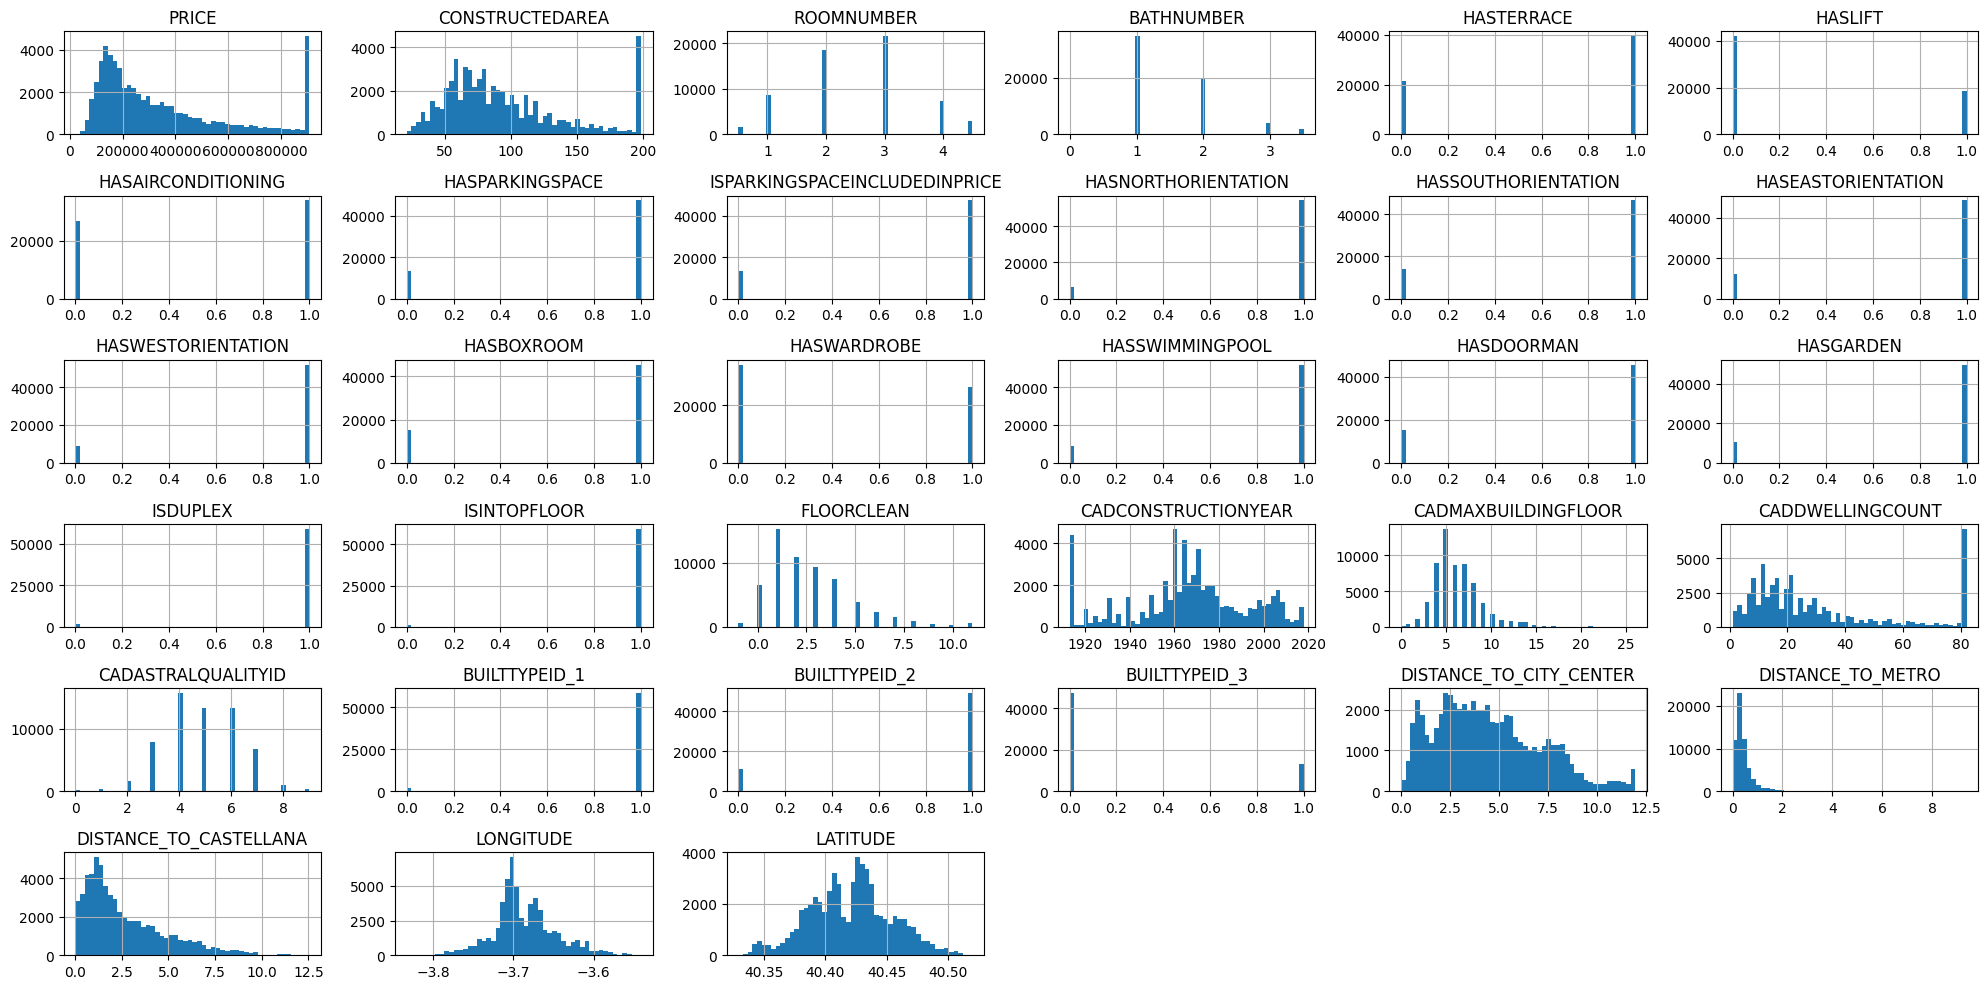

In [ ]:
train_set.hist(bins=50, figsize=(20, 10))
plt.tight_layout()
plt.show()

## 4. Escalado de características numéricas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_set)

train_set_escalado = scaler.transform(train_set)

train_set_escalado = pd.DataFrame(train_set_escalado, columns=train_set.columns)

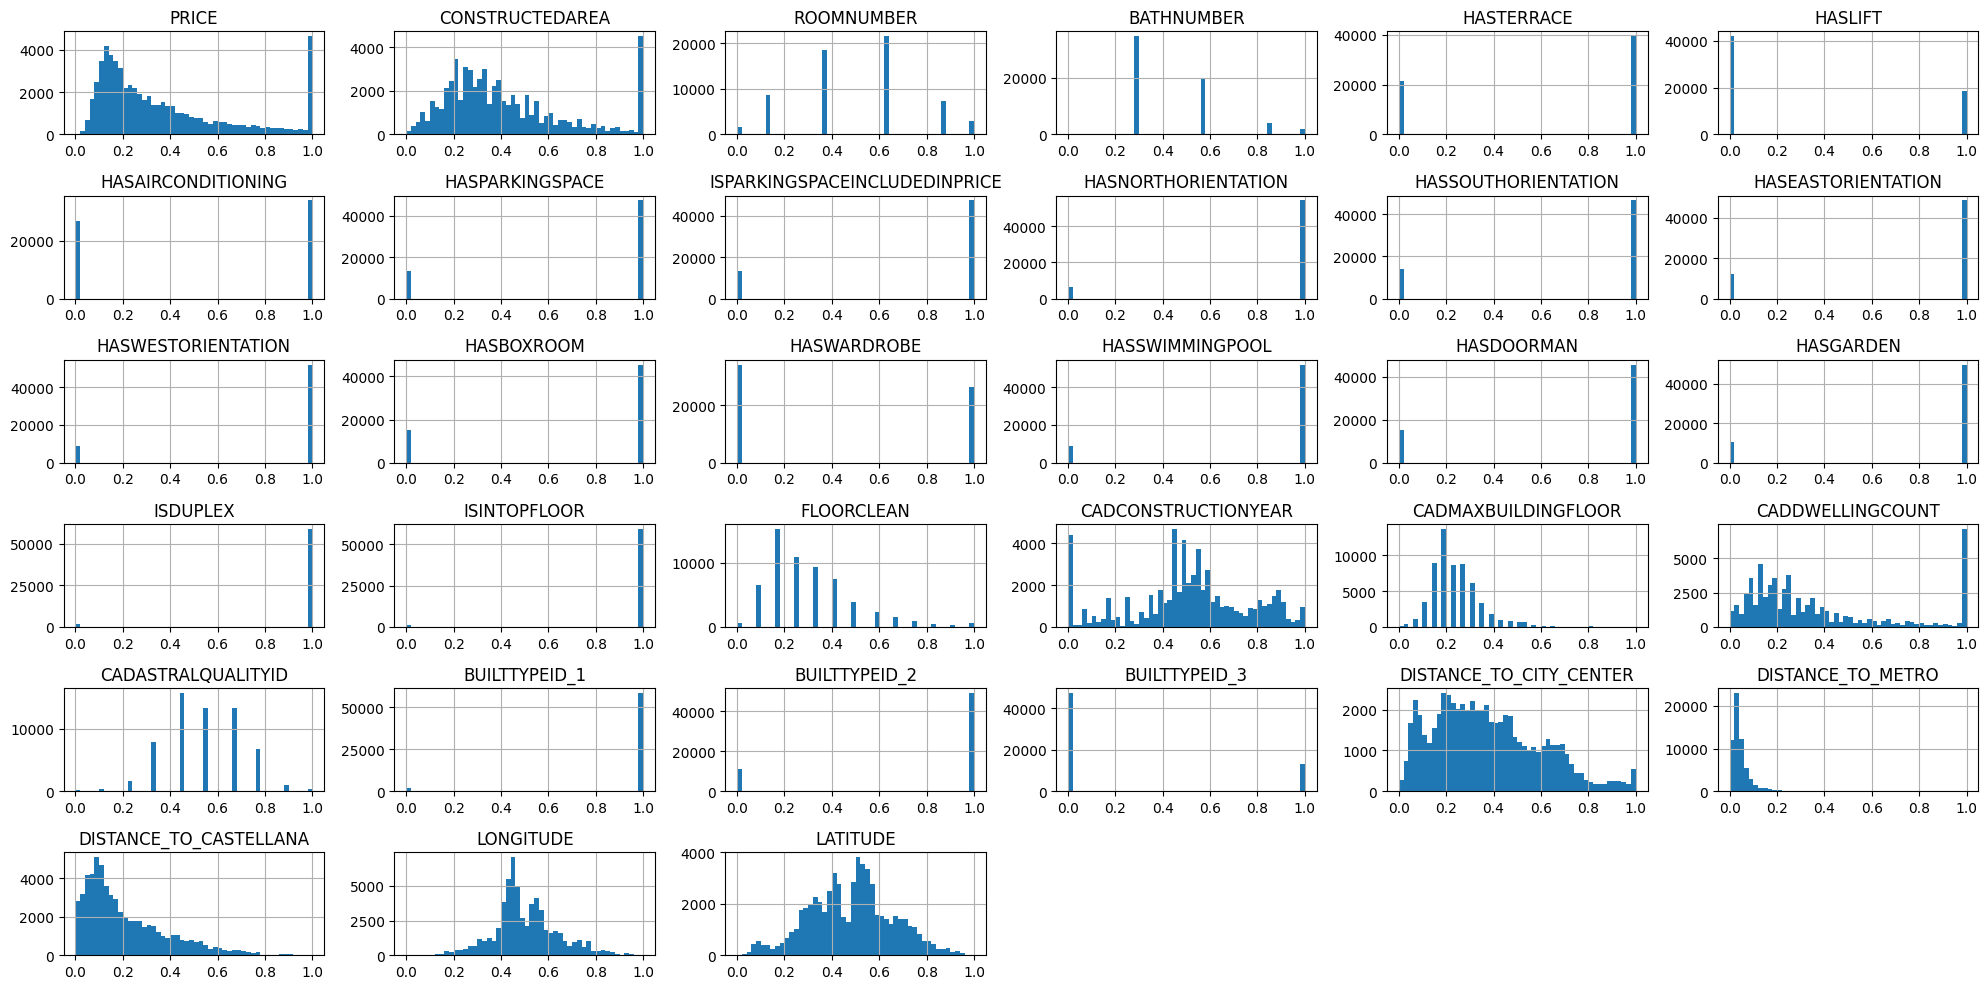

In [ ]:
train_set_escalado.hist(bins=50, figsize=(20, 10))
plt.tight_layout()
plt.show()

# Preprocesamiento de datos II

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(median_data_by_asset, test_size=0.2)

## Valores faltantes

In [ ]:
valor_imp =  {}
for carac in ['FLOORCLEAN','CADASTRALQUALITYID']:
  valor_imp[carac] = train_set[carac].mode()[0]
  train_set[carac] = train_set[carac].fillna(valor_imp[carac])

## Outliers
- `ROOMNUMBER`
- `BATHNUMBER`
- `DISTANCE_TO_CITY_CENTER`
- `PRICE`
- `CONSTRUCTEDAREA`
- `CADCONSTRUCTIONYEAR`
- `CADDWELLINGCOUNT`

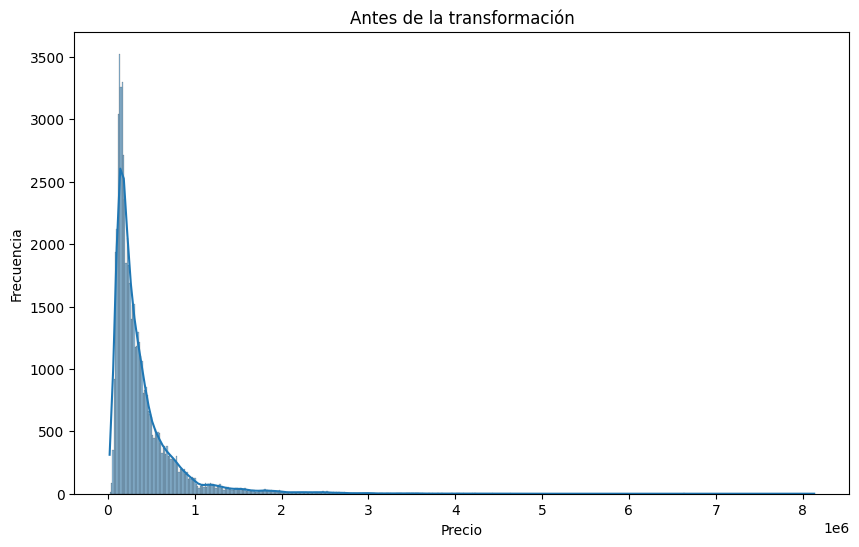

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Antes de la transformación')
sns.histplot(train_set['PRICE'], kde=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

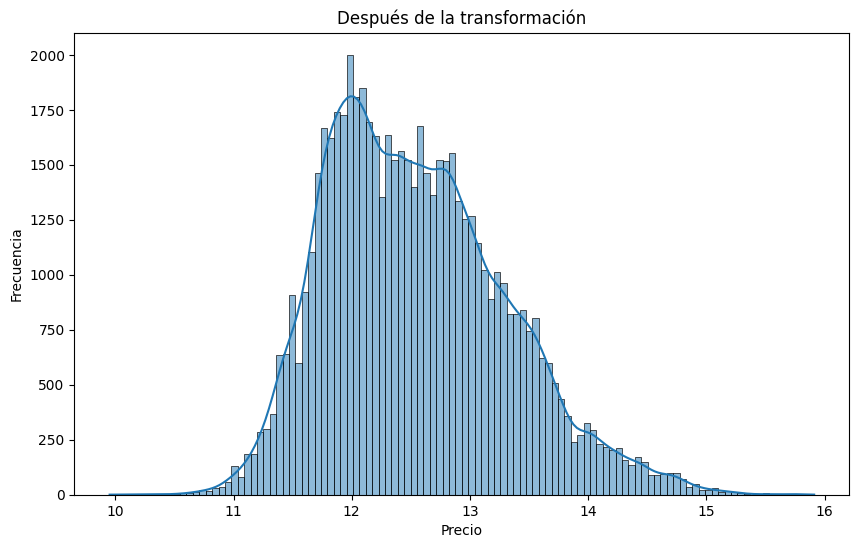

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Después de la transformación')
sns.histplot(np.log(train_set['PRICE']), kde=True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
y = np.log(train_set['PRICE'])

## Escalado de características


In [ ]:
from sklearn.preprocessing import RobustScaler

cols = train_set.select_dtypes(np.number).columns
transformer = RobustScaler().fit(train_set[cols])
train_set[cols] = transformer.transform(train_set[cols])

In [ ]:
X = train_set.drop('PRICE', axis=1)

# Entrenamiento modelos

In [ ]:
#X = train_set_escalado.drop('PRICE', axis = 1)
#y = train_set['PRICE']

## Regresión lineal

In [ ]:
from sklearn.linear_model import SGDRegressor

reg_lineal = SGDRegressor()
reg_lineal.fit(X, y)

SGDRegressor()

## Árboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

arbol = DecisionTreeRegressor()
arbol.fit(X, y)

DecisionTreeRegressor()

## Evaluación del modelo

### Preprocesamos el conjunto de datos de test

In [ ]:
y_test = test_set['PRICE']

In [ ]:
# 1. Valores faltantes
test_set.isnull().sum()

PRICE                              0
CONSTRUCTEDAREA                    0
ROOMNUMBER                         0
BATHNUMBER                         0
HASTERRACE                         0
HASLIFT                            0
HASAIRCONDITIONING                 0
HASPARKINGSPACE                    0
ISPARKINGSPACEINCLUDEDINPRICE      0
HASNORTHORIENTATION                0
HASSOUTHORIENTATION                0
HASEASTORIENTATION                 0
HASWESTORIENTATION                 0
HASBOXROOM                         0
HASWARDROBE                        0
HASSWIMMINGPOOL                    0
HASDOORMAN                         0
HASGARDEN                          0
ISDUPLEX                           0
ISINTOPFLOOR                       0
FLOORCLEAN                       588
CADCONSTRUCTIONYEAR                0
CADMAXBUILDINGFLOOR                0
CADDWELLINGCOUNT                   0
CADASTRALQUALITYID                 0
BUILTTYPEID_1                      0
BUILTTYPEID_2                      0
BUILTTYPEID_3                      0
DISTANCE_TO_CITY_CENTER            0
DISTANCE_TO_METRO                  0
DISTANCE_TO_CASTELLANA             0
LONGITUDE                          0
LATITUDE                           0
dtype: int64

In [ ]:
for carac in ['FLOORCLEAN','CADASTRALQUALITYID']:
  test_set[carac] = test_set[carac].fillna(valor_imp[carac])
test_set.isnull().sum()

PRICE                            0
CONSTRUCTEDAREA                  0
ROOMNUMBER                       0
BATHNUMBER                       0
HASTERRACE                       0
HASLIFT                          0
HASAIRCONDITIONING               0
HASPARKINGSPACE                  0
ISPARKINGSPACEINCLUDEDINPRICE    0
HASNORTHORIENTATION              0
HASSOUTHORIENTATION              0
HASEASTORIENTATION               0
HASWESTORIENTATION               0
HASBOXROOM                       0
HASWARDROBE                      0
HASSWIMMINGPOOL                  0
HASDOORMAN                       0
HASGARDEN                        0
ISDUPLEX                         0
ISINTOPFLOOR                     0
FLOORCLEAN                       0
CADCONSTRUCTIONYEAR              0
CADMAXBUILDINGFLOOR              0
CADDWELLINGCOUNT                 0
CADASTRALQUALITYID               0
BUILTTYPEID_1                    0
BUILTTYPEID_2                    0
BUILTTYPEID_3                    0
DISTANCE_TO_CITY_CENTER          0
DISTANCE_TO_METRO                0
DISTANCE_TO_CASTELLANA           0
LONGITUDE                        0
LATITUDE                         0
dtype: int64

In [ ]:
# 2. Outliers
carac_outliers = [
    'ROOMNUMBER',
    'BATHNUMBER',
    'DISTANCE_TO_CITY_CENTER',
    'CONSTRUCTEDAREA',
    'CADCONSTRUCTIONYEAR',
    'CADDWELLINGCOUNT'
]
for carac in carac_outliers:
  test_set[carac] = np.where(test_set[carac] < limite_inf[carac], limite_inf[carac], np.where(test_set[carac] > limite_sup[carac], limite_sup[carac], test_set[carac]))


In [ ]:
# 3. Escalado
test_set_escalado = scaler.transform(test_set)
test_set_escalado = pd.DataFrame(test_set_escalado, columns=test_set.columns)

In [ ]:
X_test = test_set_escalado.drop('PRICE', axis=1)

## Preprocesado de datos de test II

In [ ]:
y_test = test_set['PRICE']

# Valores faltante
for carac in ['FLOORCLEAN','CADASTRALQUALITYID']:
  test_set[carac] = test_set[carac].fillna(valor_imp[carac])

# Outliers
test_set[cols] = transformer.transform(test_set[cols])
X_test = test_set.drop('PRICE', axis=1)

### Evaluación regresión lineal

In [ ]:
y_pred = np.exp(reg_lineal.predict(X_test))

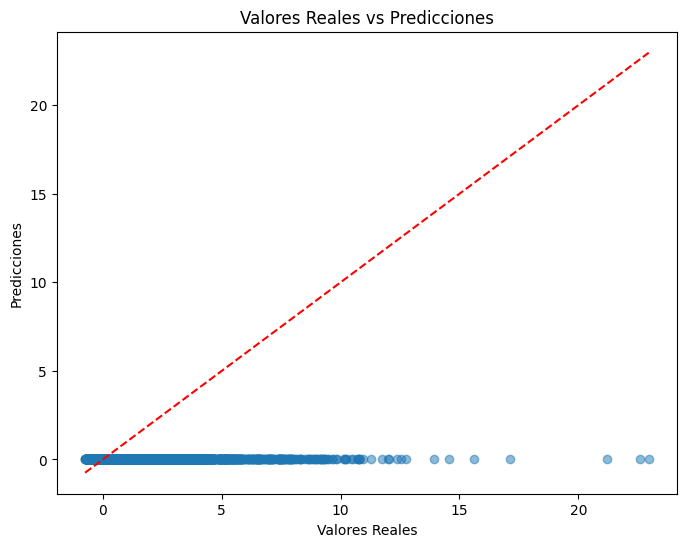

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

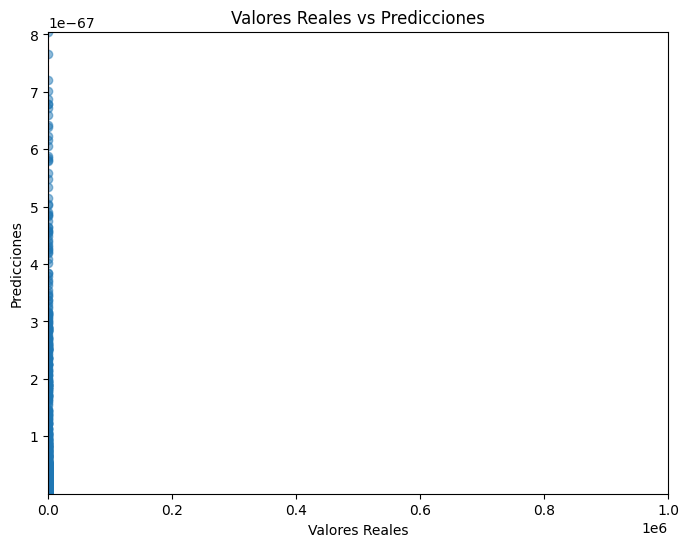

In [ ]:
# Hacer zoom para viviendas de menos de 1M€
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

plt.xlim(0, 1000000)
plt.ylim(min(y_pred), max(y_pred))  # Ajusta esto si deseas un rango específico para el eje y también

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE regresión lineal: {rmse:.2f} €")

RMSE regresión lineal: 1.43 €


## Evaluación árbol de regresión

In [ ]:
y_pred_tree = np.exp(arbol.predict(X_test))

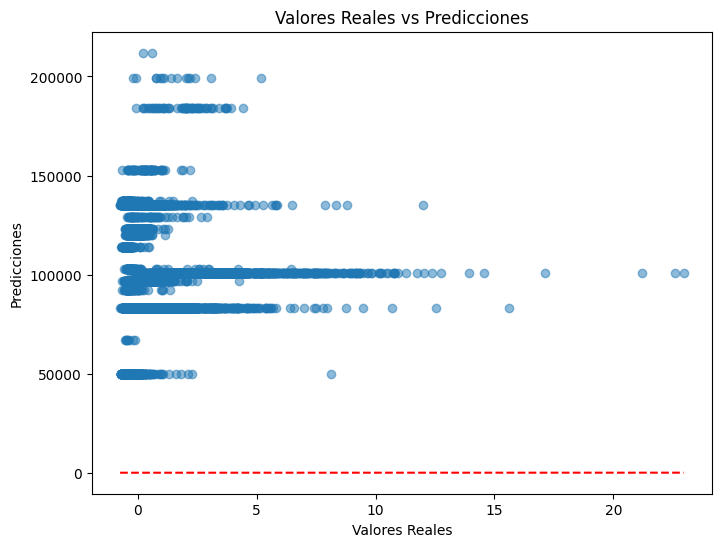

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

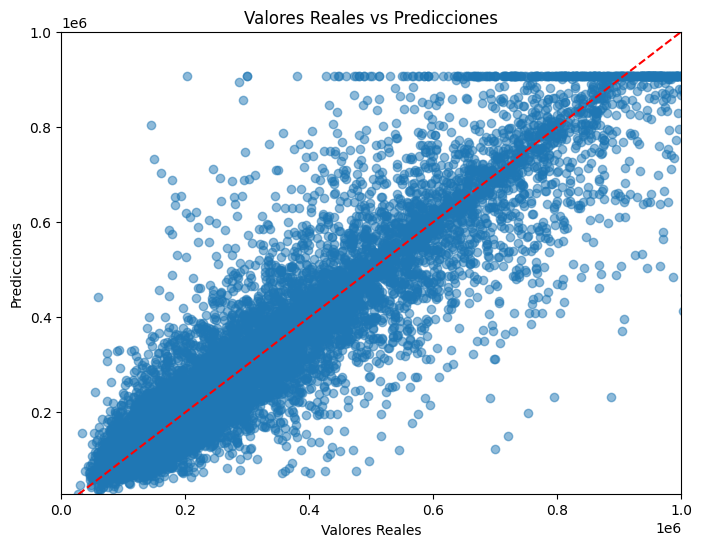

In [ ]:
# Hacer zoom para viviendas de menos de 1M€
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')

plt.xlim(0, 1000000)
plt.ylim(min(y_pred_tree), 1000000)  # Ajusta esto si deseas un rango específico para el eje y también

plt.show()

In [ ]:
# Cálculo del RMSE
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print(f"RMSE árbol de decisión: {rmse_tree:.2f} €")

RMSE árbol de decisión: 262011.48 €
